<a href="https://colab.research.google.com/github/nisha432/netflix/blob/main/Netflix_Unsupervised_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







# **Project Name**    -



##### **Project Type**    - Unsupervised/Netflix
##### **Contribution**    - Individual
**Team Member 1**         - Nisha Ahire


# **Project Summary -**

The analysis of the dataset shows that approximately 30.9% of the content on Netflix is comprised of TV shows, while the remaining 69.1% is dedicated to movies. This information is helpful in understanding the content distribution within the dataset. It indicates that there is a higher production of movies compared to TV shows. There could be various factors contributing to this observation, such as the preference for movies among viewers, the availability of diverse movie content, the time-consuming nature of producing TV shows, and other considerations. These insights provide valuable context for understanding the content landscape on Netflix and the emphasis placed on different types of programming.

Content Analysis: The analysis revealed that the United States has the highest number of content on Netflix, followed by India. The number of content additions increased from 2015, with peak years being 2019 for movies and 2020 for TV shows. However, there has been a decline in content additions afterward.

Ratings and Genres: The most common rating for both movies and TV shows on Netflix is "TV-MA". The top genres vary across different categories, with international movies, dramas, and comedies being popular overall. For TV shows, the top genres are kids' TV, international TV shows, and dramas. In movies, the top genres are documentaries, stand-up comedy, dramas, and international movies.

Release Year Analysis: The number of releases has been increasing since 2001, with the highest number of releases in 2018. The release of TV shows has been increasing each year, with the peak in 2020. In movies, the release year peaked in 2017, followed by a steady increase until 2016, a slight fall in 2018, and a significant decline in 2019 and 2020.

Top Actors: Anupam Kher is the top actor on Netflix, followed by Takahiro Sakurai and Shahrukh Khan. Several Indian actors are among the top 10 actors, indicating their popularity and presence in Netflix movies.

Top Directors: The top directors for TV shows on Netflix include Alastair Fothergill, Shin Won-ho, Iginio Straffi, and others. For movies, directors like Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas stand out.

The gained insights can potentially have a positive business impact for Netflix. They provide opportunities for recognition, collaborations, and engaging viewers. However, there are risks such as dependency on specific directors and not adapting to changing trends. Netflix should strive for a balanced approach, conduct market research, and maintain strong relationships with directors to mitigate these risks and sustain positive growth.
We tested 4 models (k_means, Silhoutte score analysis, Dendogram, Dbscan)

We got cluster 2 as optimal and the Sillhoute: 0.6514 as the score which is good. We got the optimal cluster to be 2 from checking different models.

# **GitHub Link -**

https://github.com/Deesplore/Unsupervised_ML

# **Problem Statement**


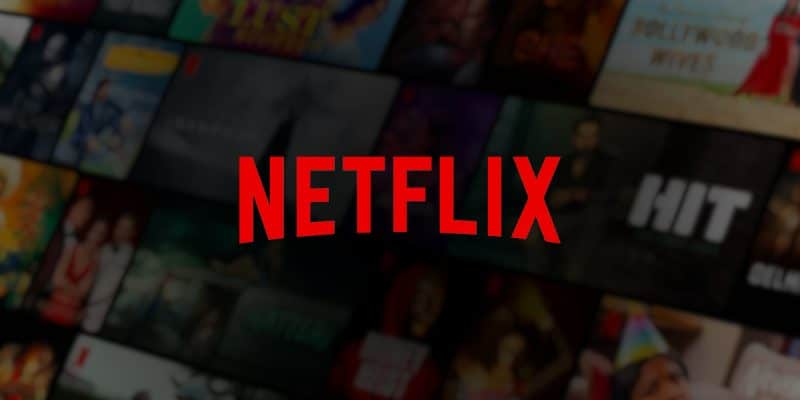

The problem at hand is to perform clustering on a dataset containing information about Netflix shows and movies. The dataset includes various attributes such as genre, release year, ratings, and duration. The goal is to group similar shows and movies together based on these attributes, without the use of any pre-existing labels or target variables.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import missingno as msno
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal
import matplotlib.patheffects as path_effects
!pip install kaleido

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [68]:
# Dataset First Look
data.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
show_df.shape

(7787, 12)

### Dataset Information

In [69]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
show_df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
show_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Figure size 1000x600 with 0 Axes>

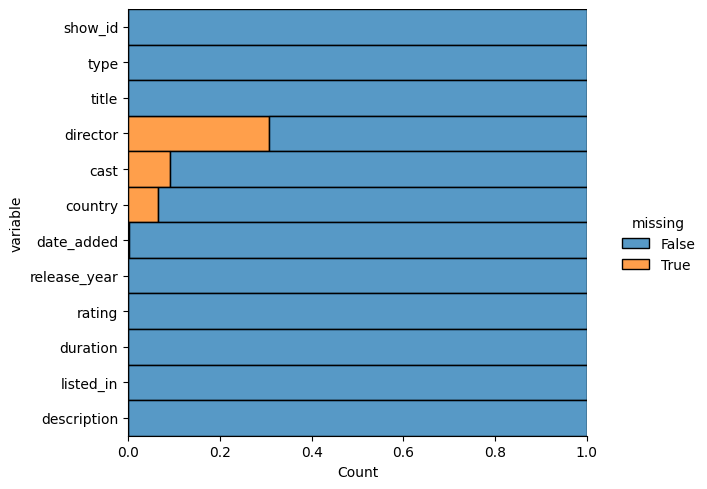

In [12]:
plt.figure(figsize=(10,6))
sns.displot(
    data=show_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Axes: >

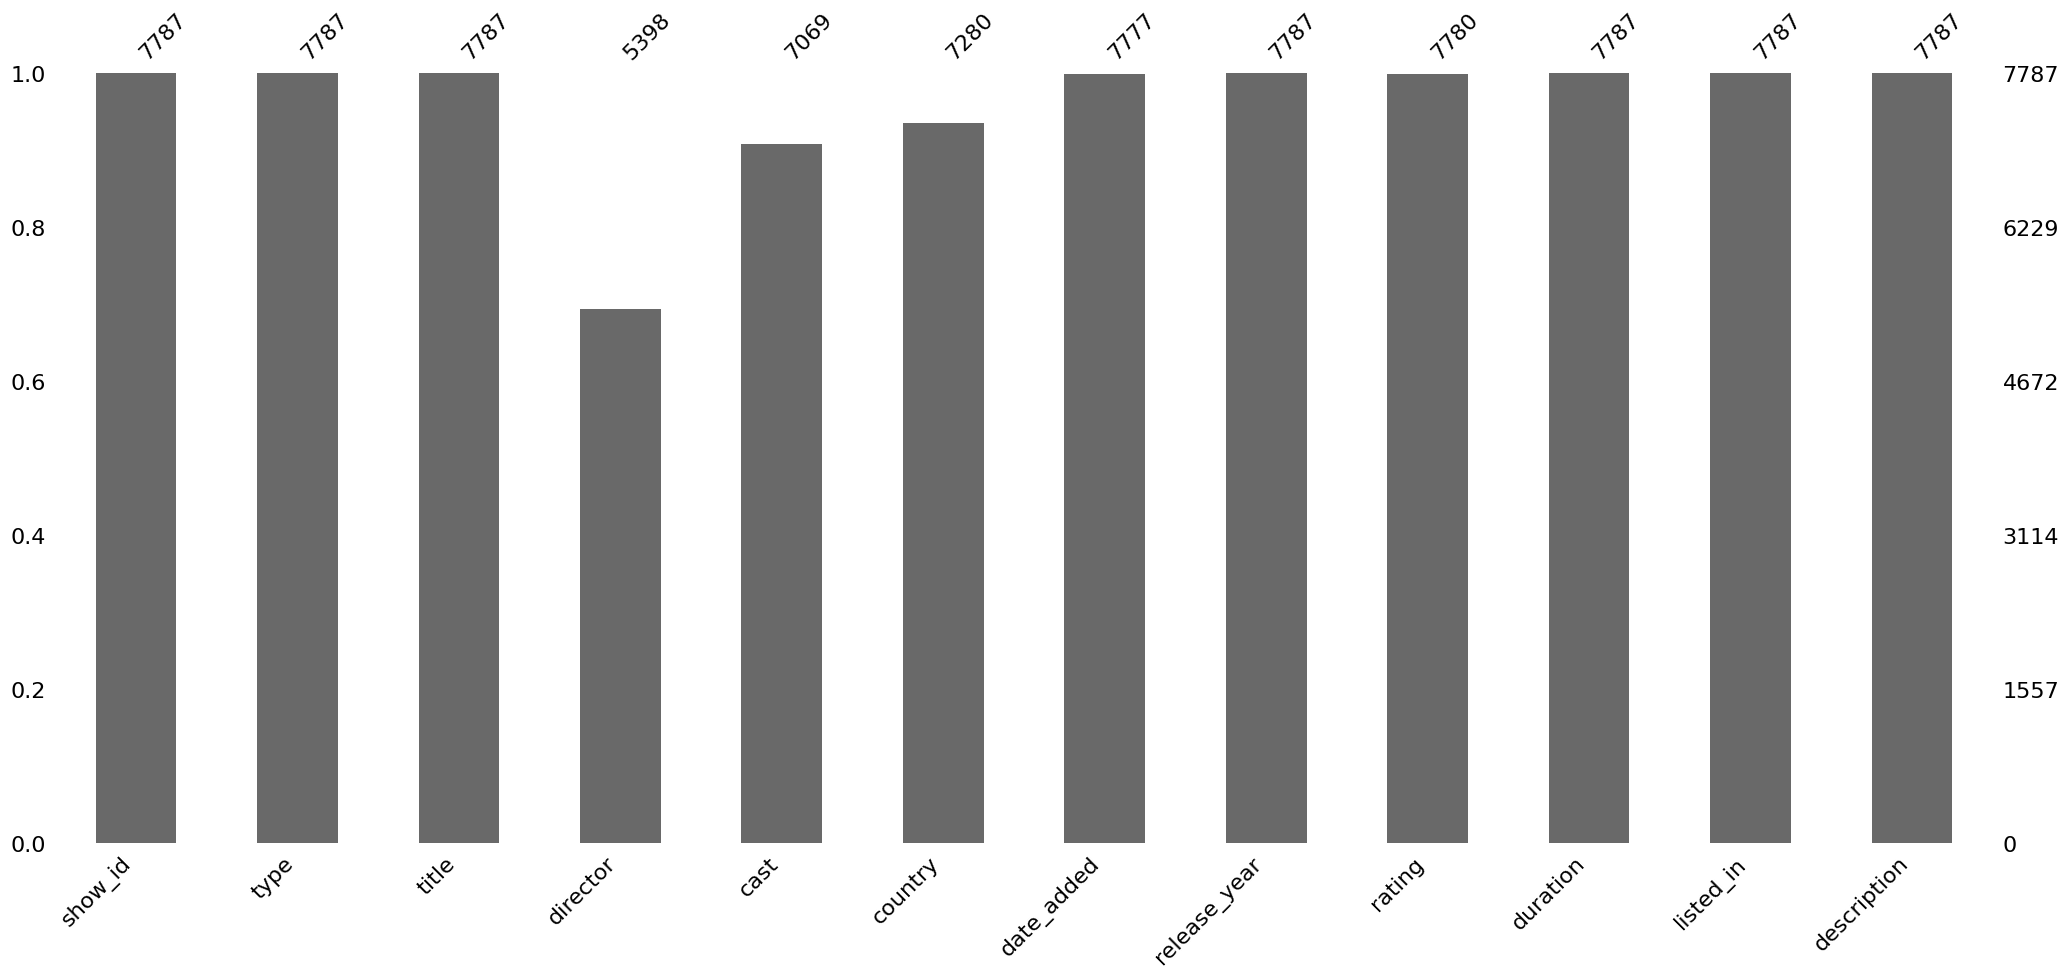

In [13]:
# Visualizing the missing values
msno.bar(show_df)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
show_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
show_df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

## ***Attribute Information***

**show_id** : Unique ID for every Movie / Tv Show


**type** : Identifier - A Movie or TV Show


**title** : Title of the Movie / Tv Show


**director** : Director of the Movie


**cast** : Actors involved in the movie / show


**country** : Country where the movie / show was produced


**date_added** : Date it was added on Netflix


**release_year** : Actual Releaseyear of the movie / show


**rating** : TV Rating of the movie / show


**duration** : Total Duration - in minutes or number of seasons


**listed_in** : Genere


**description**: The Summary description


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in show_df.columns.tolist():
  print("No. of unique values in ",i,"is",show_df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


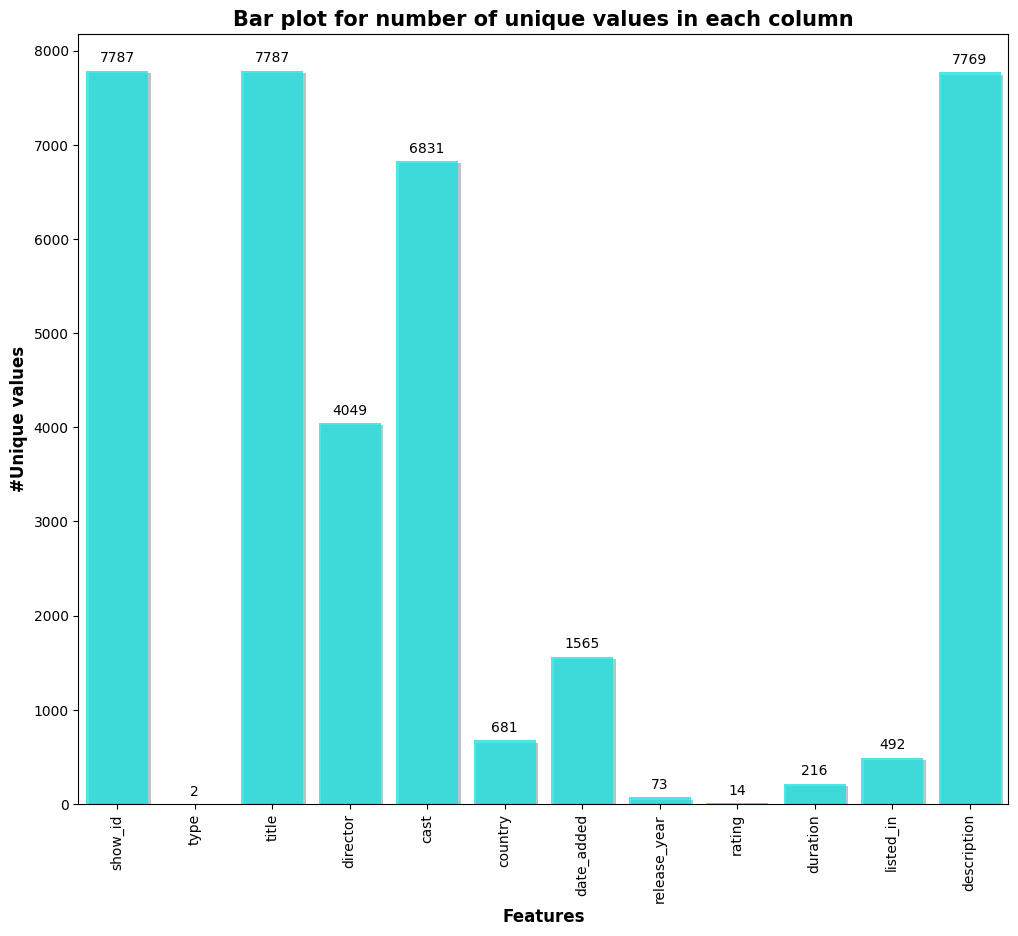

In [17]:
# Unique Values in each column
unique_a = pd.DataFrame()
unique_a['Features'] = show_df.columns
unique=[]
for i in show_df.columns:
    unique.append(show_df[i].nunique())
unique_a['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(12,10))

splot = sns.barplot(x=unique_a['Features'], y=unique_a['Uniques'],path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()], alpha=0.8,color = 'cyan')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
show_df.sample(5)

show_id     type                         title  \
3565   s3566    Movie                        Lechmi   
5137   s5138  TV Show                  Red vs. Blue   
7383   s7384  TV Show                    Vai Anitta   
2852   s2853    Movie  How to Win the US Presidency   
7469   s7470    Movie                   Walking Out   

                         director  \
3565             B.N. Shajeer Sha   
5137                          NaN   
7383                          NaN   
2852                  Cal Saville   
7469  Alex Smith, Andrew J. Smith   

                                                   cast        country  \
3565  Parvathy Ratheesh, Biju Sopanam, Sethulekshmi ...          India   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...  United States   
7383                                             Anitta         Brazil   
2852                                                NaN  United States   
7469  Matt Bomer, Josh Wiggins, Bill Pullman, Alex N...  United States   

             date_added  release_year rating    duration  \
3565     August 1, 2018          2017  TV-MA     147 min   
5137                NaN          2015     NR  13 Seasons   
7383  November 16, 2018          2018  TV-MA    1 Season   
2852     August 1, 2016          2016  TV-PG      51 min   
7469    October 1, 2019          2017  PG-13      96 min   

                                              listed_in  \
3565      Comedies, Horror Movies, International Movies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
7383     Docuseries, International TV Shows, Reality TV   
2852                                      Documentaries   
7469              Dramas, Independent Movies, Thrillers   

                                            description  
3565  The spirit of a murdered woman contacts four b...  
5137  This parody of first-person shooter games, mil...  
7383  Go behind the scenes with Brazilian pop icon A...  
2852  This whimsical look at rough-and-tumble Americ...  
7469  A suburban teen goes hunting with his estrange...

In [19]:
# creating rid of nan values
show_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
# copying our data
show_df1=show_df.copy()

In [21]:
# we wull replace this nan values
show_df1[['director','cast','country']] = show_df1[['director','cast','country']].fillna('not known')
show_df1['rating'] = show_df1['rating'].fillna(show_df1['rating'].mode()[0])
show_df1.dropna(axis=0, inplace = True)

In [22]:
show_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [23]:
# checking our objective column.....
pd.crosstab(type, show_df1['type'])

type            Movie  TV Show
row_0                         
<class 'type'>   5377     2400

In [24]:
# working wiht date column
show_df1["date_added"] = pd.to_datetime(show_df1['date_added'])
show_df1['days'] = show_df1['date_added'].dt.day
show_df1['year'] = show_df1['date_added'].dt.year
show_df1['month'] = show_df1['date_added'].dt.month

In [25]:
#checking  after seperating date ,month,year
show_df1[["days","year","month"]].sample(5).T

5989  7762  924   1640  2943
days     23    31    11     1     1
year   2017  2019  2018  2020  2019
month     6    12     5    11     6

In [26]:
# working with our country column
show_df1['country'] = show_df1['country'].apply(lambda x: x.split(',')[0])

In [27]:
show_df1['country'].value_counts().reset_index().T

0      1               2          3       4      5   \
index    United States  India  United Kingdom  not known  Canada  Japan   
country           2877    956             576        506     259    236   

             6            7      8       9   ...         72           73  \
index    France  South Korea  Spain  Mexico  ...  Mauritius  Puerto Rico   
country     196          194    168     123  ...          1            1   

             74        75            76        77       78            79  \
index    Jordan  Slovenia  West Germany  Zimbabwe  Namibia  Soviet Union   
country       1         1             1         1        1             1   

           80       81  
index    Iran  Somalia  
country     1        1  

[2 rows x 82 columns]

In [28]:
# splittig our type column into category
movies = show_df1[show_df1['type']=='Movie']
tv_shows= show_df1[show_df1['type']=='TV Show']

In [29]:
# code for creating our top 10
# Top 10 actors netflix
show_df1['cast'] = show_df1['cast'].astype(str)
show_df1['cast_name'] =show_df1['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in show_df1['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
columns = {'index' : 'actors_name', 0 : 'movies in which the appeared'}).iloc[1:11]

In [30]:
# working wiht our duration column
show_df1['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [31]:
# Selecting the durations for movies and tv shows
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Removing string values from tv shows duration and converting into int
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '')
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Seasons', '')
duration_tv_shows.duration = duration_tv_shows.duration.str.replace('s', '')
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Removing string values from movie duration and converting into int
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

In [32]:
dataset=show_df.copy()

### What all manipulations have you done and insights you found?

1. we made copy of our dataset and then we started working with our null values column so we replace the nan values of country, director and cast with not known as we cannot drop this column because of loss of data..
2. we replace the nan values of rating with its mode value..
3. we splitted our objective column that is type into its category of tv shows and movies..
4. we worked with our date column and splitted it into months, years and days..
5.we wrote a code for getting out top 10 actors fron the cast column..
6.we checked our duration column and we made the necessary changes...as we replace the unwanted part and converted it into int format

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

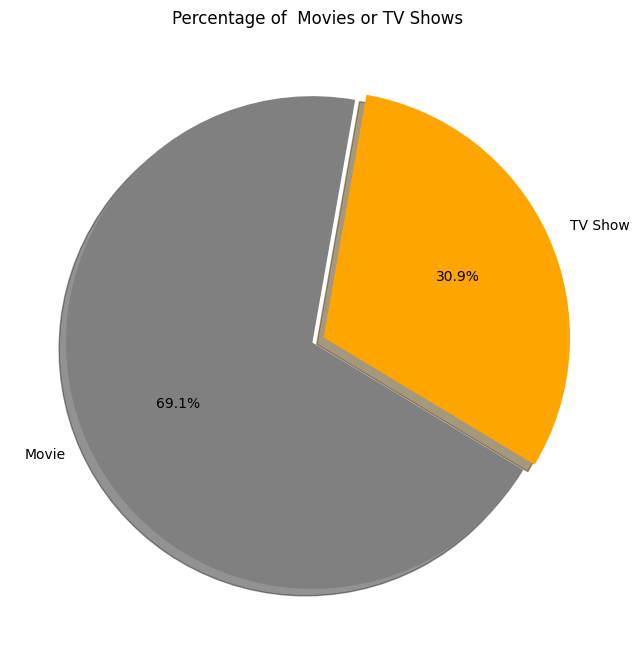

In [33]:
# plotting pie cahrt
plt.figure(figsize=(14,8))
plt.title("Percentage of  Movies or TV Shows")
graph = plt.pie(show_df1.type.value_counts(),shadow = True,
                                        colors = ( "grey", "orange"),
                                       explode=(0.025,0.025),
                 labels=show_df1.type.value_counts().index,autopct='%1.1f%%', startangle=80)
plt.show()


##### 1. Why did you pick the specific chart?

Because it was clearly seen that we have two types of categoires in our data and pie chart would be the best for the visualization of the following

A Pie Chart can only display one series of data. Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie.

.

The pie chart looks best if the figure and axes are square, or the Axes aspect is equal.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that around 30.9% of the content are of tv shows and remaining 69.1% are for the movies..in our dataset it is very helpful because it tells that the data provide has produced more number of movies rather than tv show it might be becasue variety that early conclusions plus the time consuming content and many more

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in many ways as we can see the chart for the movies part is more which make makers more to work on movies than tvshows.
People engagement is more on movies rather then tv shows..

#### Chart - 2

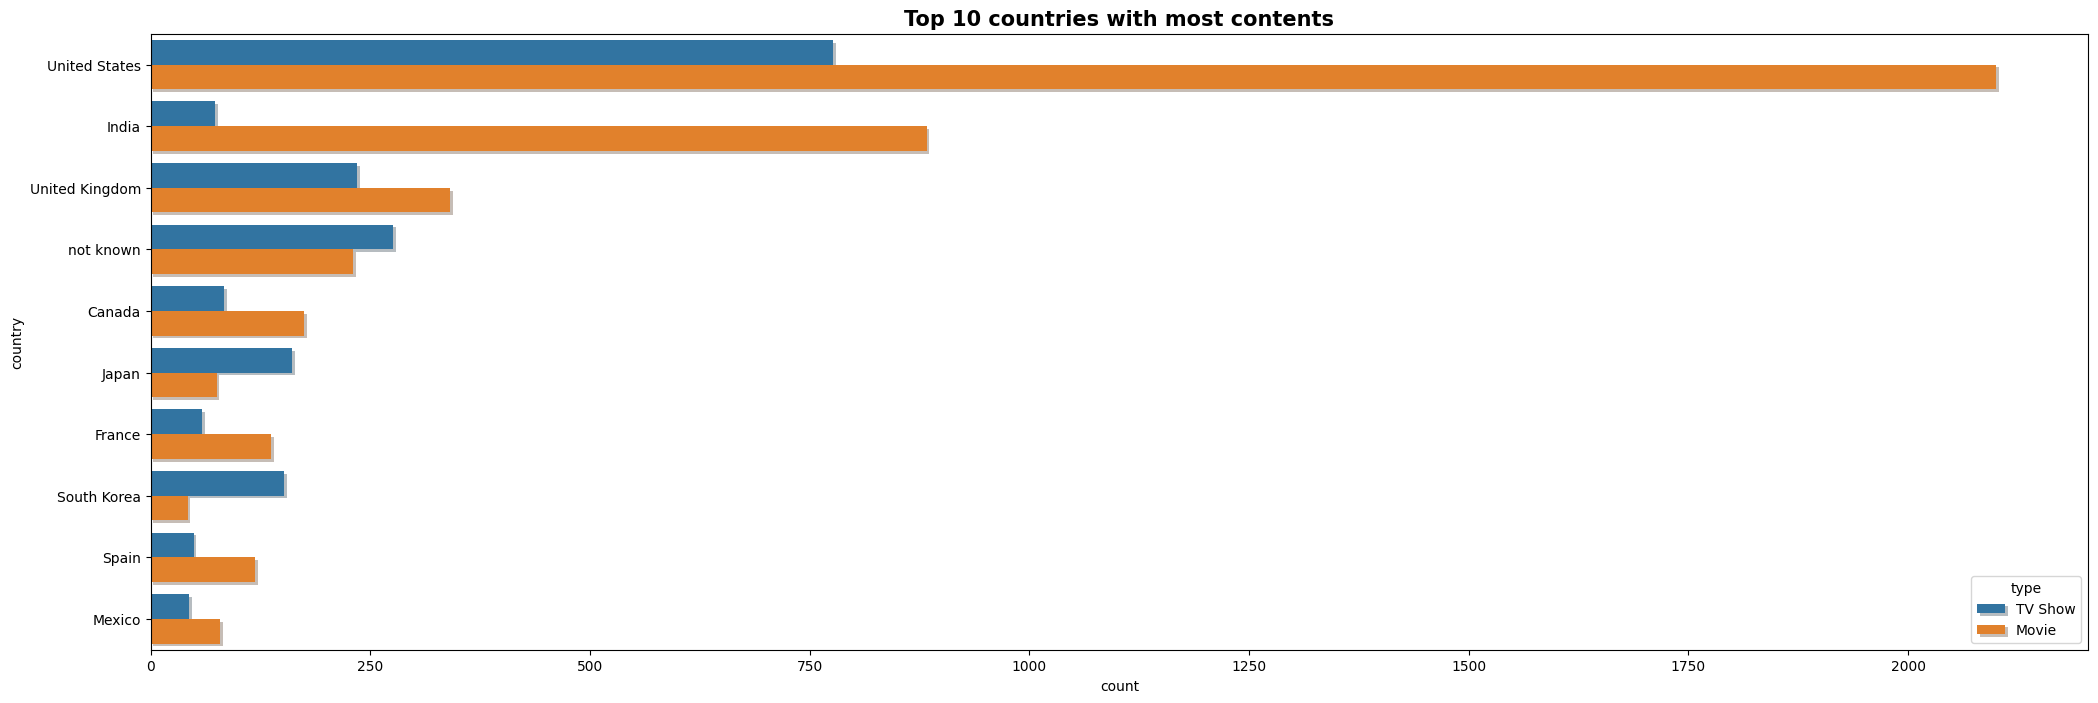

In [34]:
plt.figure(figsize=(25,8))
sns.countplot(y=show_df1['country'],order=show_df1['country'].value_counts().index[0:10],path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],hue=show_df1['type'])
plt.xticks(rotation=360)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()


In [35]:
# here we are checking the contents over the years....
col = "year"
# contents for tv shows ..............
content_1 = tv_shows[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)
# contents for movies...............
content_2 = movies[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

In [36]:
# plotting the graph................
plot1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#00db6e"))
plot2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#6e00db"))

data = [plot1, plot2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [37]:
# Checking growth of the contents over the months.
col = "month"
# contents for tv shows ..............
content_1 = tv_shows[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)
# contents for movies...............
content_2 = movies[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

In [38]:
# Plot growth of the contents over the months.
plot1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#00db6e"))
plot2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#6e00db"))

data = [plot1, plot2]
layout = go.Layout(title="Content added over the month",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [39]:
# Checking growth of the contents over the days
col = "days"
# contents for tv shows ..............
content_1 = tv_shows[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)
# contents for movies...............
content_2 = movies[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

In [40]:
# Plot growth of the contents over the day.
plot1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#00db6e"))
plot2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#6e00db"))

data = [plot1, plot2]
layout = go.Layout(title="Content added in days",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

##### 1. Why did you pick the specific chart?


Here I have used two different plot one is count plot and other is scatter plot

Countplot

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

Parameters-
The following parameters are specified when we create a countplot, let us get a brief idea of them-

x and y- This parameter specifies the data we refer to for representation and then observes the highlighted patterns.
color- This parameter specifies the color that can give a good appearance to our plot.
palette- It takes the value of the palette. It is mostly used to show the hue variable.
hue- This parameter specifies the column name.
data- This parameter specifies the data frame we would like to take for the representation. For instance, data can be an array.
dodge- This parameter is an optional one and it accepts a Boolean value as input.
saturation- This parameter accepts a float value. A variation in the intensity of colors can be observed when we specify this.
hue_order- The parameter hue_order takes strings as an input.
kwargs- The parameter kwargs specifies the key and value mappings.
ax- The parameter ax is an optional one and is used to take axes on which plots are created.
orient- The parameter orient is an optional one and tells the orientation of the plot that we need, horizontal or vertical.
Scatter plot
The following are the syntax parameters for the scatter() method:

x_axis_value - An array containing x-axis data for scatter in the plot.
y_axis_value - an array with y-axis data.
s - it is the size of the marker (can be scalar or array of size equal to the size of the x-axis or y-axis)
c- the order of the colors of the markers
marker- marker style for scatter plot in the python.
cmap - cmap name for scatter plot in the python.
Linewidths - these are the size of the marker border for scatter in the plot.
edgecolor: the border color of a marker for scatter in the plot.
Alpha - blending value for scatter fucntion, between 0 and 1 (transparent to opaque)
All of the parameters except x-axis data and y-axis data are optional, and their default value is None.
  The scatter function in python shows a different type of figures in the graph. The figure shows different sizes, and opacities in python.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals that the United States has the highest number of content on Netflix, followed by India as the second country with the most content.

The data indicates a significant increase in the number of content additions starting from 2015. Specifically, in 2019, the number of movies added reached its peak, while for TV shows, it was in 2020. However, after that period, there has been a decline in the rate of content additions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for Netflix.

Knowing that the United States has the highest number of content on Netflix allows the company to focus on catering to the preferences and demands of the American audience. It can help guide decisions related to content acquisition, production, and marketing strategies targeted towards the US market.

Recognizing India as the second country with the most content provides valuable information about the growing user base and potential market in India. Netflix can leverage this insight to further invest in content creation and localization efforts to cater to the Indian audience's preferences and cultural nuances.

Understanding the trend of increasing content additions from 2015 onwards and the specific peak years for movies (2019) and TV shows (2020) allows Netflix to align its content acquisition and release strategies accordingly. It can prioritize securing rights to high-quality movies and TV shows during these peak years to attract and retain subscribers.

Recognizing the subsequent decline in the rate of content additions helps Netflix adjust its expectations and plan for maintaining a steady stream of new content. It can prompt the company to explore alternative strategies such as focusing on original content production, partnering with other production studios, or acquiring exclusive distribution rights to maintain a fresh and diverse library for its subscribers.

By leveraging these insights, Netflix can make informed business decisions, tailor its content offerings to specific markets, and ultimately enhance customer satisfaction and retention, leading to a positive impact on its business performance.

#### Chart - 3

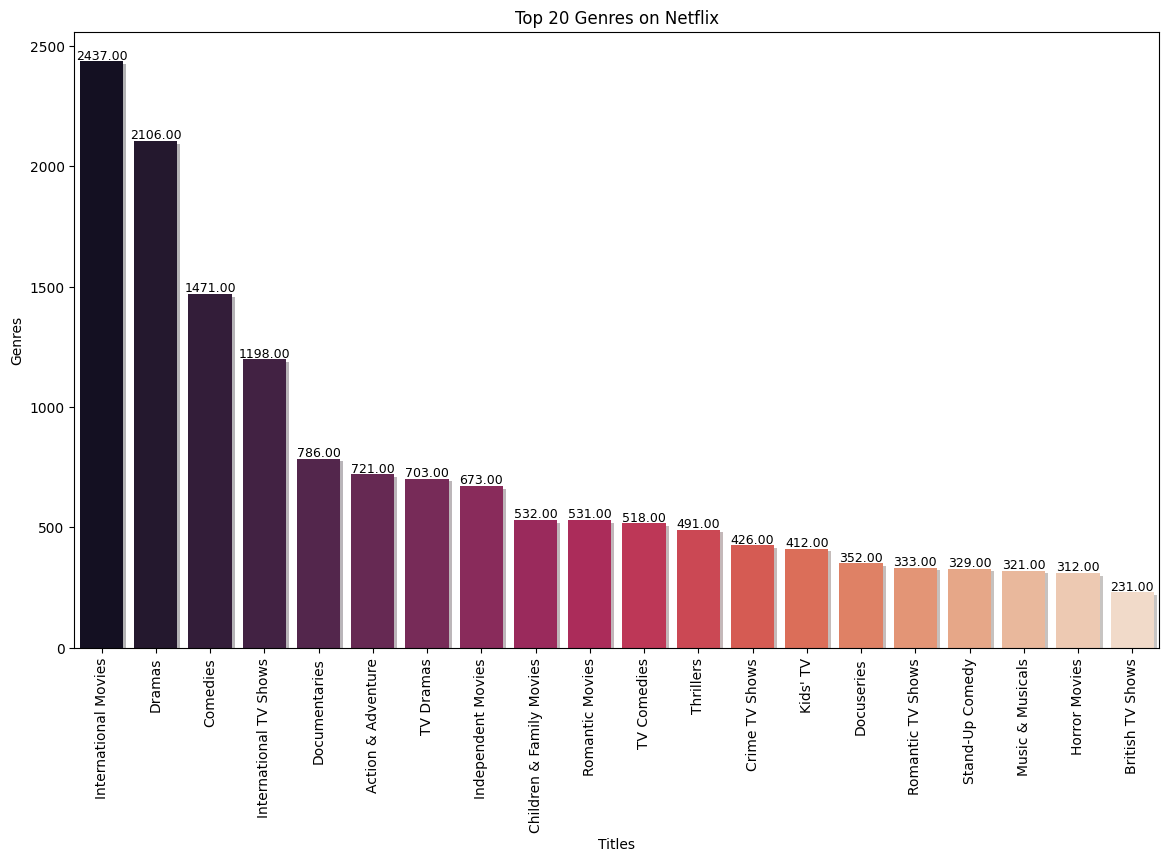

In [41]:
#Top 20 Genres(listed_in) on Netflix
filtered_genres = show_df1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(14,8))
g = sns.countplot(x = filtered_genres,palette="rocket" ,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=filtered_genres.value_counts().index[:20])
plt.xticks(rotation = 90)
for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

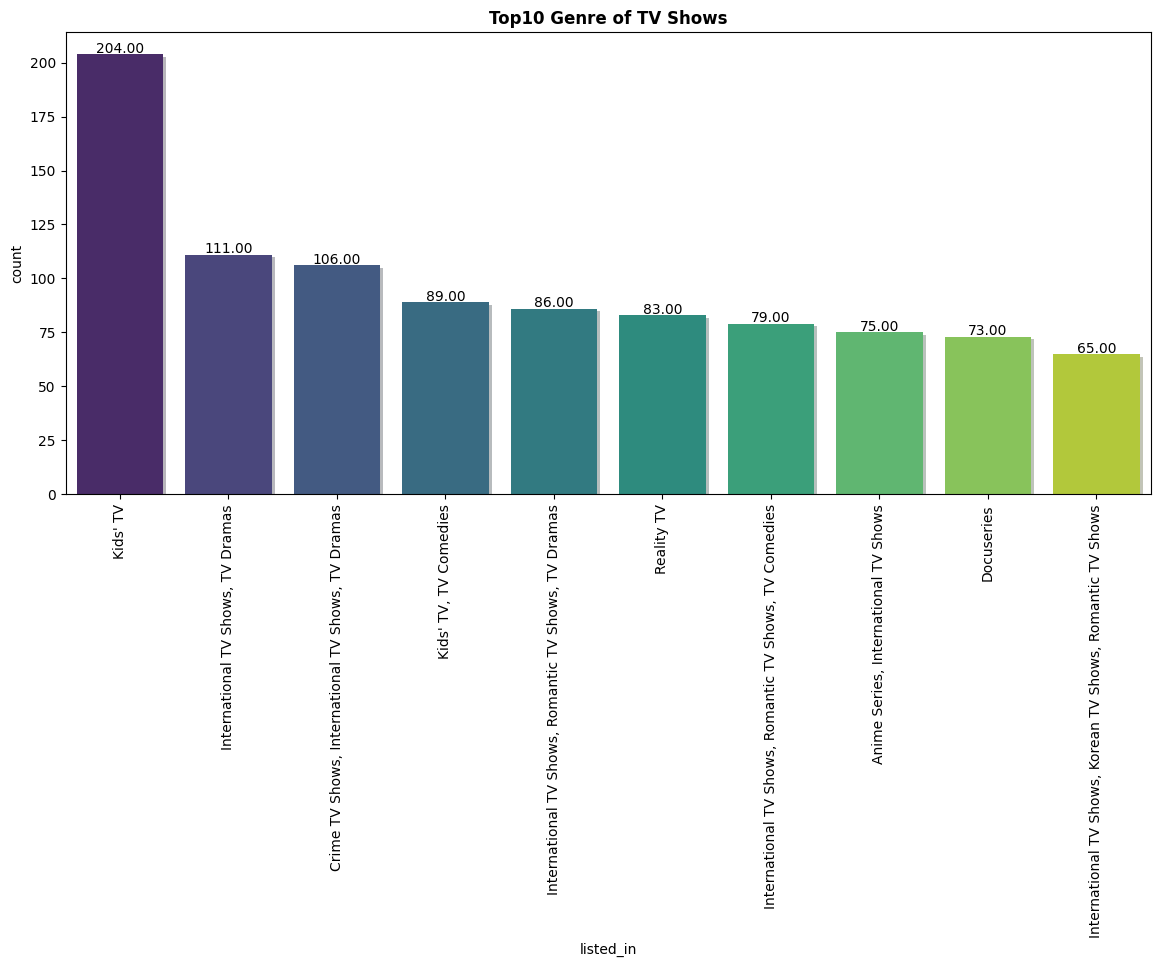

In [42]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
plt.xticks(rotation = 90)
g=sns.countplot(x=tv_shows['listed_in'],data=tv_shows,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=tv_shows['listed_in'].value_counts().index[0:10],palette="viridis")
for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

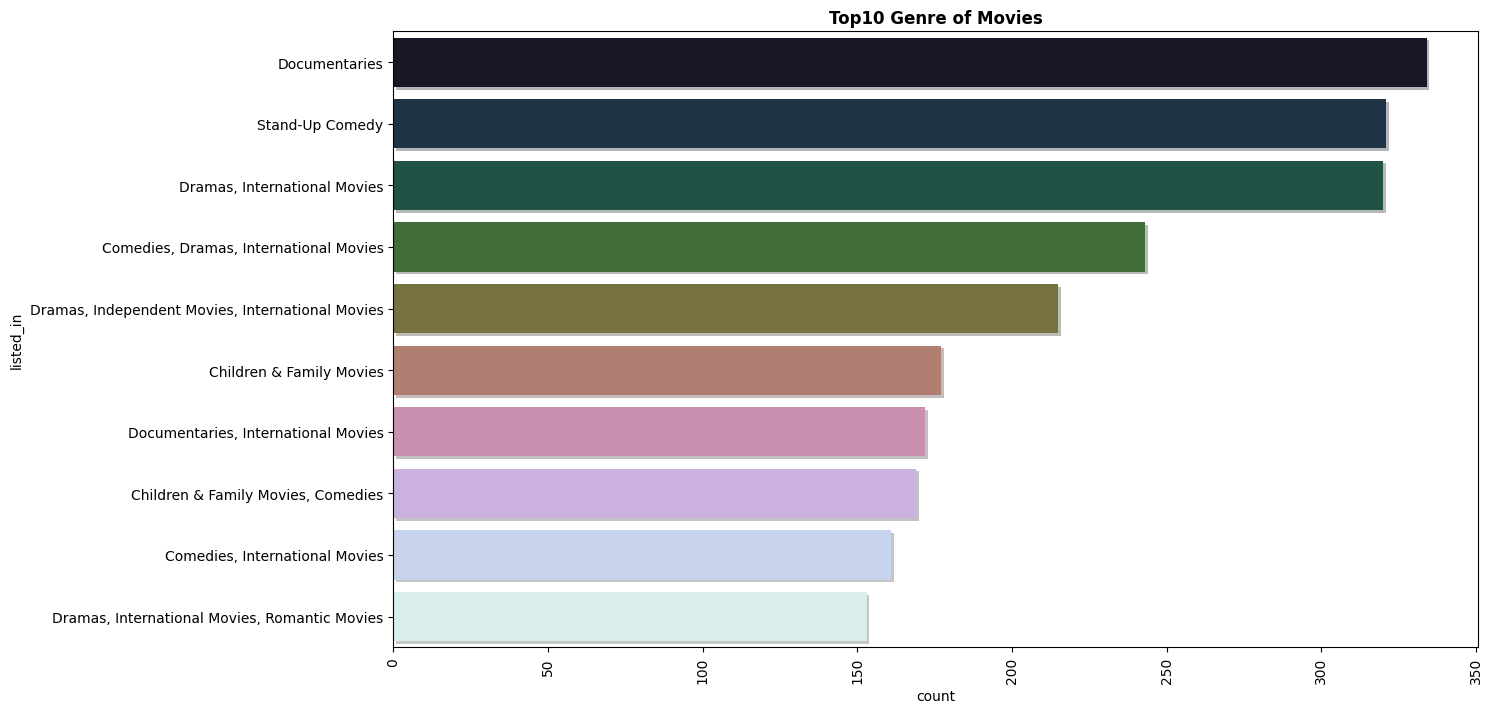

In [43]:
#Analysing top10 genres of movies
plt.figure(figsize=(14,8))
plt.title('Top10 Genre of Movies',fontweight="bold")
plt.xticks(rotation = 90)
g=sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],palette="cubehelix")

##### 1. Why did you pick the specific chart?

Countplot

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

Parameters-
The following parameters are specified when we create a countplot, let us get a brief idea of them-

x and y- This parameter specifies the data we refer to for representation and then observes the highlighted patterns.
color- This parameter specifies the color that can give a good appearance to our plot.
palette- It takes the value of the palette. It is mostly used to show the hue variable.
hue- This parameter specifies the column name.
data- This parameter specifies the data frame we would like to take for the representation. For instance, data can be an array.
dodge- This parameter is an optional one and it accepts a Boolean value as input.
saturation- This parameter accepts a float value. A variation in the intensity of colors can be observed when we specify this.
hue_order- The parameter hue_order takes strings as an input.
kwargs- The parameter kwargs specifies the key and value mappings.
ax- The parameter ax is an optional one and is used to take axes on which plots are created.
orient- The parameter orient is an optional one and tells the orientation of the plot that we need, horizontal or vertical.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals that the top genres on Netflix are dominated by international movies, with dramas being the second most popular genre, followed by comedies. This insight highlights the audience's interest in diverse cinematic experiences from around the world, along with their preference for engaging and emotionally driven storytelling.

In terms of TV shows, the top genres on Netflix are led by kids' TV shows, indicating the platform's popularity among younger viewers. Following kids' TV shows, international TV shows take the second spot, offering a glimpse into the global appeal of content from different countries and cultures. Lastly, dramas emerge as another popular genre among Netflix viewers, showcasing their inclination towards character-driven narratives and compelling storytelling.

When it comes to movies, the top genres on Netflix are documentaries, which captivate viewers with their informative and thought-provoking content. Standup comedy emerges as the second most popular genre, highlighting the audience's desire for light-hearted and humorous entertainment. Additionally, dramas and international movies hold significant positions among the top genres, underscoring the appeal of emotionally impactful storytelling and diverse cultural experiences offered by these genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights into the top genres across movies and TV shows on Netflix can guide content acquisition strategies, content production decisions, and marketing efforts. By understanding the preferences of their audience, Netflix can curate and promote content that aligns with these popular genres, enhancing viewer satisfaction and engagement on the platform.

#### Chart - 4

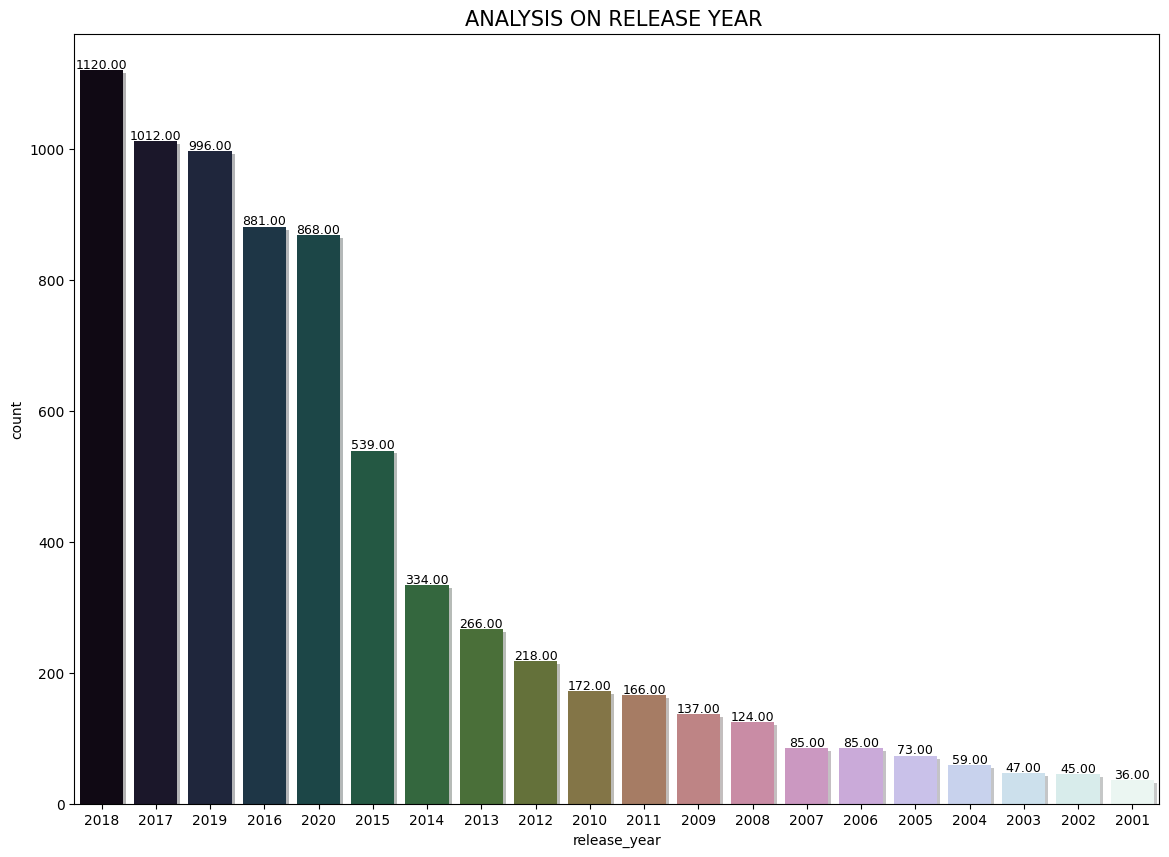

In [44]:
# Chart - 4 visualization code
#ANALYSIS ON RELEASE YEAR
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=show_df1, palette="cubehelix", path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=show_df1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
plt.show()

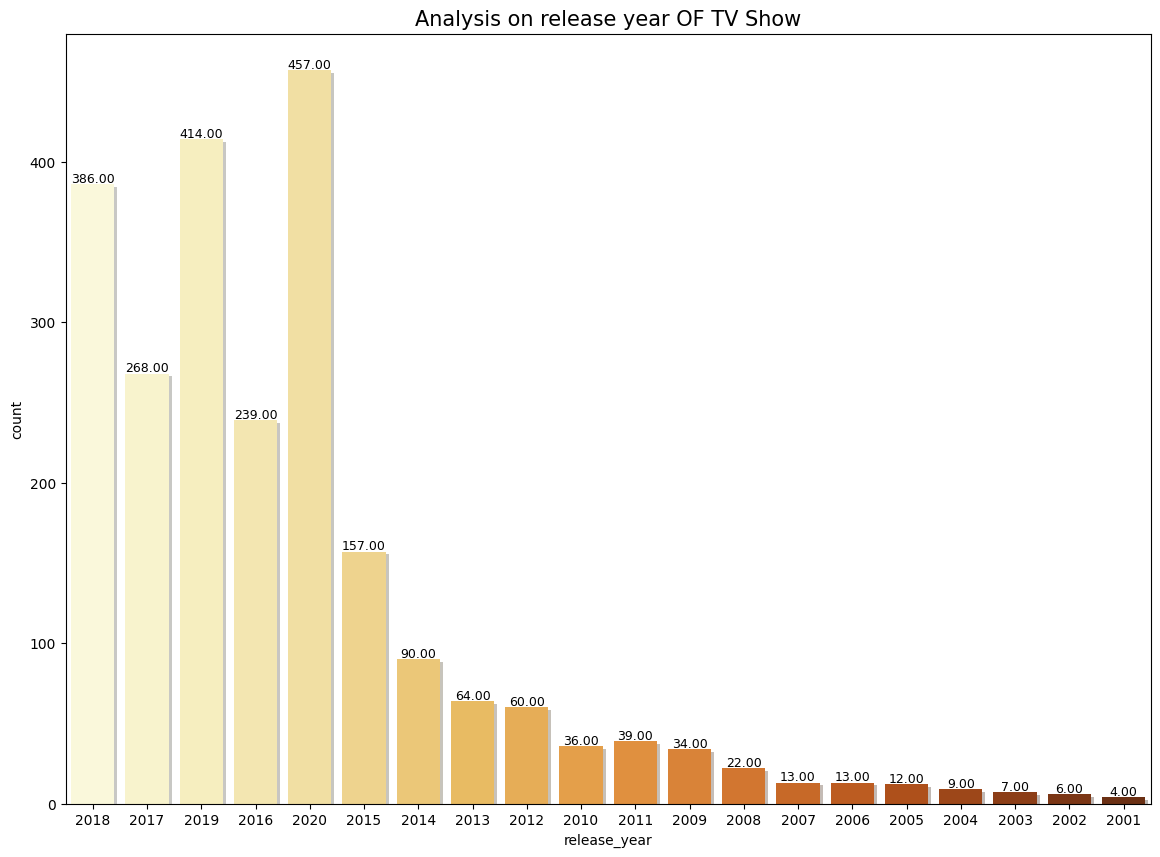

In [45]:
#ANALYSIS ON RELEASE  OF TV Show
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=tv_shows, palette="YlOrBr",path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()], order=show_df1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('Analysis on release year OF TV Show', fontsize=15)
plt.show()

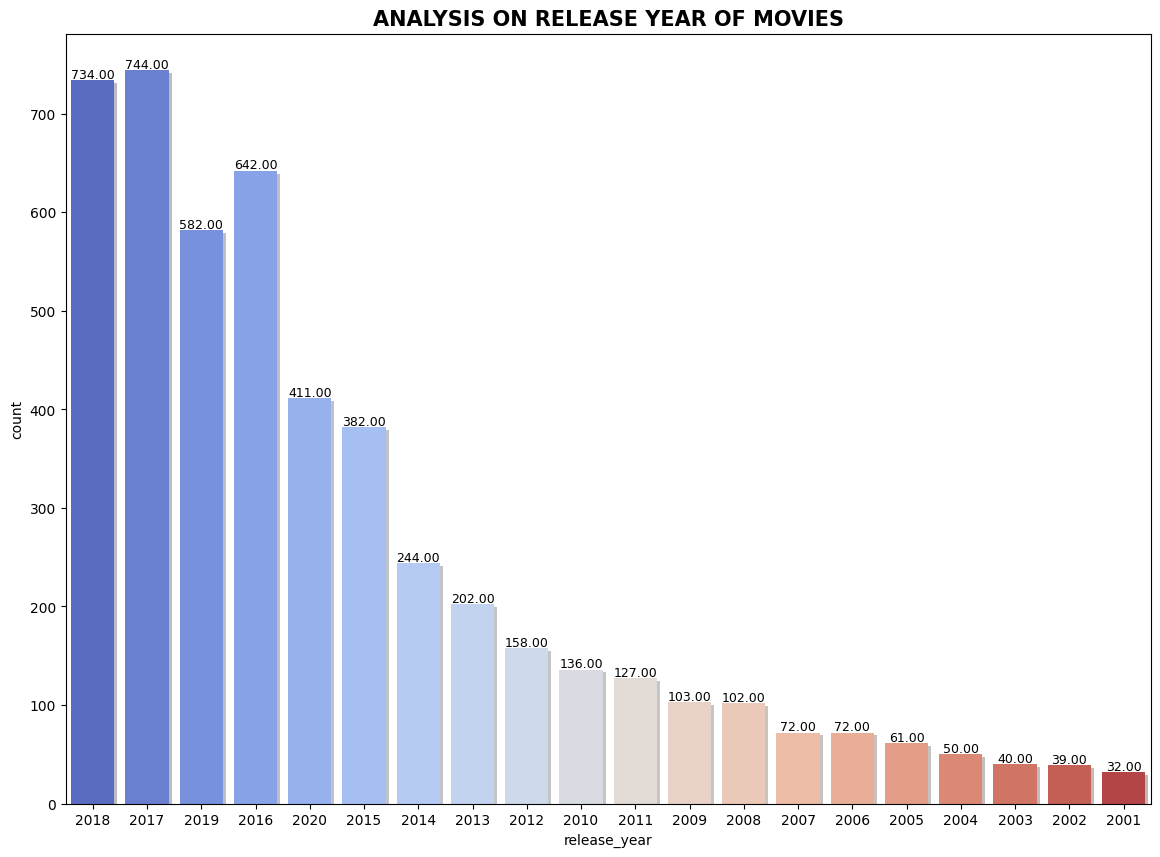

In [46]:
#Year wise analysis for movies
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=movies, palette="coolwarm", path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=show_df1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

Parameters-
The following parameters are specified when we create a countplot, let us get a brief idea of them-

x and y- This parameter specifies the data we refer to for representation and then observes the highlighted patterns.
color- This parameter specifies the color that can give a good appearance to our plot.
palette- It takes the value of the palette. It is mostly used to show the hue variable.
hue- This parameter specifies the column name.
data- This parameter specifies the data frame we would like to take for the representation. For instance, data can be an array.
dodge- This parameter is an optional one and it accepts a Boolean value as input.
saturation- This parameter accepts a float value. A variation in the intensity of colors can be observed when we specify this.
hue_order- The parameter hue_order takes strings as an input.
kwargs- The parameter kwargs specifies the key and value mappings.
ax- The parameter ax is an optional one and is used to take axes on which plots are created.
orient- The parameter orient is an optional one and tells the orientation of the plot that we need, horizontal or vertical.

##### 2. What is/are the insight(s) found from the chart?

The analysis indicates a consistent increase in the number of releases on Netflix since 2001, with the highest number of releases occurring in the year 2018. This upward trend suggests a growing catalog of content over the years, catering to the diverse preferences of Netflix viewers.

The analysis of TV show releases reveals a positive trend, with the number of releases increasing steadily year by year. The peak in TV show releases was observed in 2020, indicating a significant investment in producing and acquiring new TV show content. This trend reflects the platform's commitment to offering a wide range of TV shows to cater to the evolving interests of its audience.

The analysis of movie release years showcases a peak in 2017, with a steady increase leading up to that year. However, there is a slight decline in the number of movie releases in 2018, followed by a more significant decline in 2019 and 2020. This pattern suggests a temporary slowdown in movie releases during those years, potentially influenced by various factors such as production schedules, market demand, and strategic decisions by Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights into the release patterns of content on Netflix can inform decision-making processes related to content acquisition, production, and release scheduling. By understanding the trends and fluctuations in release years, Netflix can strategically plan and optimize their content offerings to meet audience expectations and maintain a fresh and engaging content library.




#### Chart - 5

TV-MA :
This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
Contains content that may be unsuitable for children. This rating was originally TV-M prior to the announced revisions to the rating system in August 1997 but was changed due to a trademark dispute and in order to remove confusion with the Entertainment Software Rating Board's (ESRB) "M for Mature" rating for video games. This rating is rarely used by broadcast networks or local television stations due to FCC restrictions on program content, although it is commonly applied to television programs featured on certain cable channels (basic and premium networks) and streaming networks for both mainstream and softcore programs. Programs with this rating may include crude indecent language, explicit sexual activity and graphic violence

R :
Restricted. Under 17 Requires Accompanying Parent or Adult Guardian.

Contains adult material. May include graphic language, violence, sex, nudity and drug use.


PG-13 :
Parents strongly cautioned. May be Inappropriate for ages 12 and under

TV-14 :
This program contains material that most parents would find unsuitable for children under 14 years of age.
Programs contain material that parents or adult guardians may find unsuitable for children under the age of 14. The FCC warns that "parents are cautioned to exercise some care in monitoring this program and are cautioned against letting children under the age of 14 watch unattended". Programs with this rating contain intensely suggestive dialogue, strong coarse language, intense sexual situations or intense violence
TV-PG :
Programs may contain some material that parents or guardians may find inappropriate for younger children. Programs assigned a TV-PG rating may include infrequent coarse language, some sexual content, some suggestive dialogue, or moderate violence.
NR :
Not Rated

TV-G :
Programs are generally suitable for all audiences, though they may not necessarily contain content of interest to children. The FCC states that "this rating does not signify a program designed specifically for children, most parents may let younger children watch this program unattended". The thematic elements portrayed in programs with this rating contain little or no violence, mild language, and little or no sexual dialogue or situations

TV-Y :
 Designed to be appropriate for children of all ages. The thematic
 elements portrayed in programs with this rating are specifically
designed for a very young audience.

PG :
Parental Guidance Suggested. Some Material May Not Be Suitable for Children.

May contain some profanity, violence, or brief nudity. Does not contain drug use. Parental guidance suggested for more mature themes.

G :
General Audiences. All Ages Admitted.

Contains very little violence and no nudity, sex or drug use.

Contains very little violence and no nudity, sex or drug use.

NC-17 :
Adults Only. No One 17 and Under Admitted.

Contains violence, sex, drug abuse and other behavior that most parents would consider off-limits to children.

TV-Y7-FV :
Designed for children age 7 and older. The FCC states that it "may be more appropriate for children who have acquired the developmental skills needed to distinguish between make-believe and reality".The thematic elements portrayed in programs with this rating contain mild fantasy and comedic violence.

Programs where fantasy violence may be more intense or more combative.
Programs given the "FV" content descriptor exhibit more 'fantasy violence' and are generally more intense or combative than other programs rated TV-Y7

UR :
Unrated

In [47]:
show_df1.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'numbers'}).T

0      1      2    3      4     5      6    7     8   9   10  \
Rating   TV-MA  TV-14  TV-PG    R  PG-13  TV-Y  TV-Y7   PG  TV-G  NR   G   
numbers   2868   1928    804  665    386   279    270  247   194  83  39   

               11  12     13  
Rating   TV-Y7-FV  UR  NC-17  
numbers         6   5      3

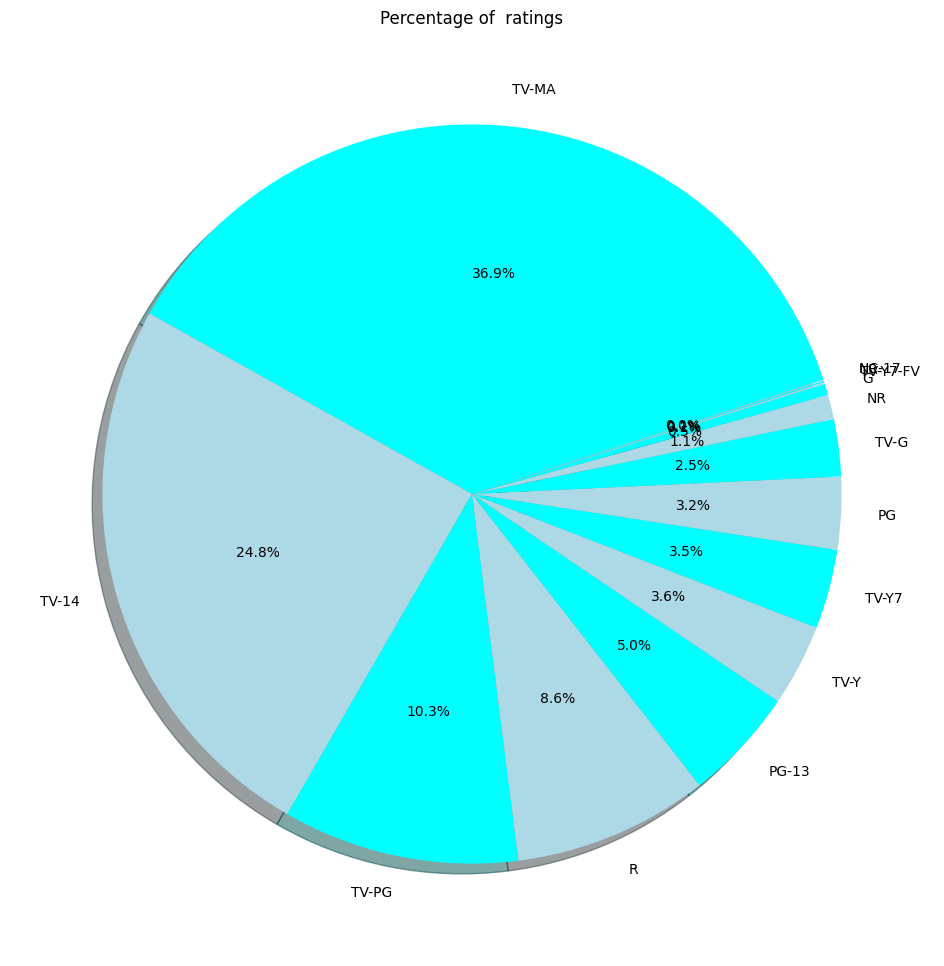

In [48]:
# plotting a pie cahrt

plt.figure(figsize=(18,12))
plt.title("Percentage of  ratings")
graph = plt.pie(show_df1.rating.value_counts(),shadow = True,
                                        colors = ( "cyan", "lightblue"),
                                       labels=show_df1.rating.value_counts().index,autopct='%1.1f%%', startangle=18)
plt.show()


<Figure size 1400x800 with 0 Axes>

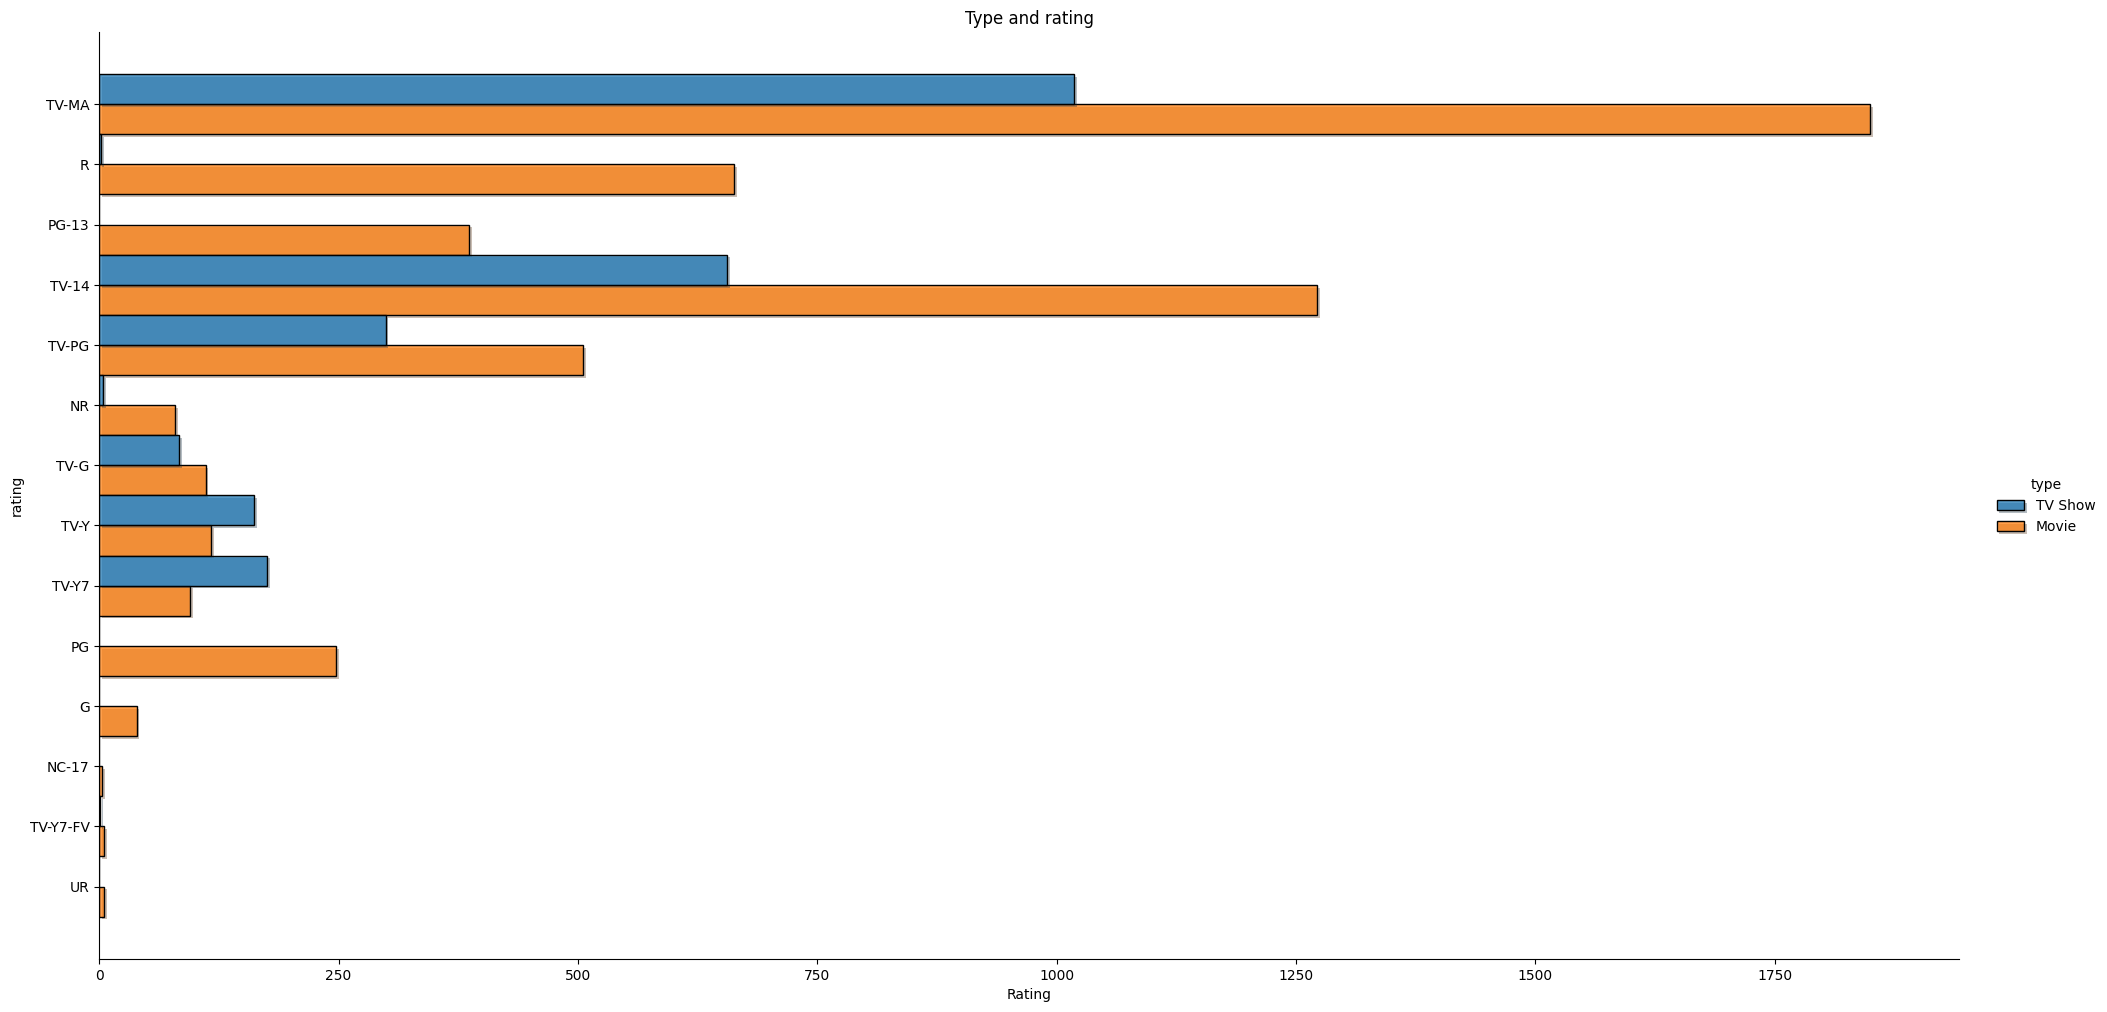

In [49]:
# plotting a bar chart for this..
a = plt.figure(figsize=(14,8))
a = sns.displot(y= show_df1['rating'], hue = 'type', data = show_df1, kind = 'hist', height=10, aspect=2, bins = 50,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()] ,multiple='dodge')
a = plt.title('Type and rating')
a = plt.xlabel('Rating')

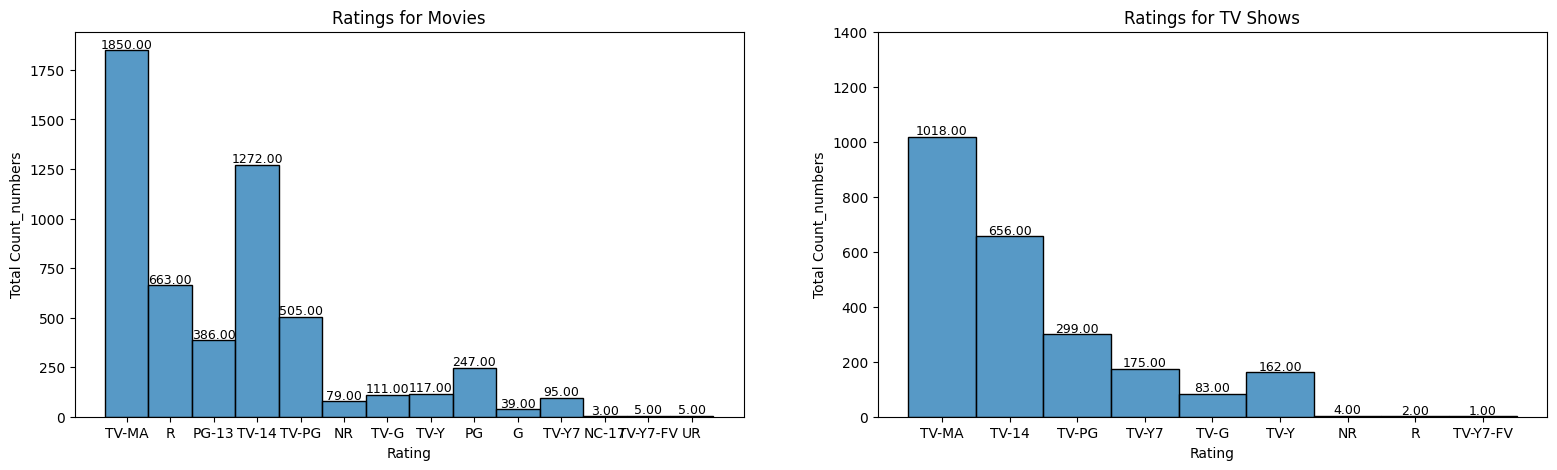

In [50]:
# Ratings for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(movies.rating, ax=ax[0]);
for bar in g1.patches:
    g1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count_numbers")
g2 = sns.histplot(tv_shows.rating, ax=ax[1]);
for bar in g2.patches:
    g2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count_numbers")
fig.show()

##### 1. Why did you pick the specific chart?

To gain insights into the ratings and types of content on Netflix,

Rating Analysis:

The data reveals a wide range of ratings for content on Netflix, including various age categories such as TV-Y, TV-MA, PG, etc.
By examining the distribution of ratings, we can identify the most common rating categories and understand the content's intended audience.

Type Analysis:

The content on Netflix can be categorized into two main types: movies and TV shows.
By analyzing the distribution of types, we can determine the proportion of movies and TV shows in the Netflix library.
This analysis can provide insights into the platform's content strategy and help understand the viewers' preferences regarding movie vs. TV show content.

##### 2. What is/are the insight(s) found from the chart?

After analyzing the ratings for movies and TV shows on Netflix, it is evident that the "TV-MA" rating category has the highest ratings for both types of content. This rating indicates that the content is intended for mature audiences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The prevalence of the "TV-MA" rating suggests that Netflix offers a significant amount of content that caters to adult viewership. This information is valuable for understanding the content preferences and target audience of the platform.

By recognizing the popularity of the "TV-MA" rating, content creators and providers can make informed decisions about the type of content to develop or license for distribution on Netflix. Additionally, this insight can help users make choices based on their viewing preferences and ensure they have access to content suitable for their age and preferences.

#### Chart - 6

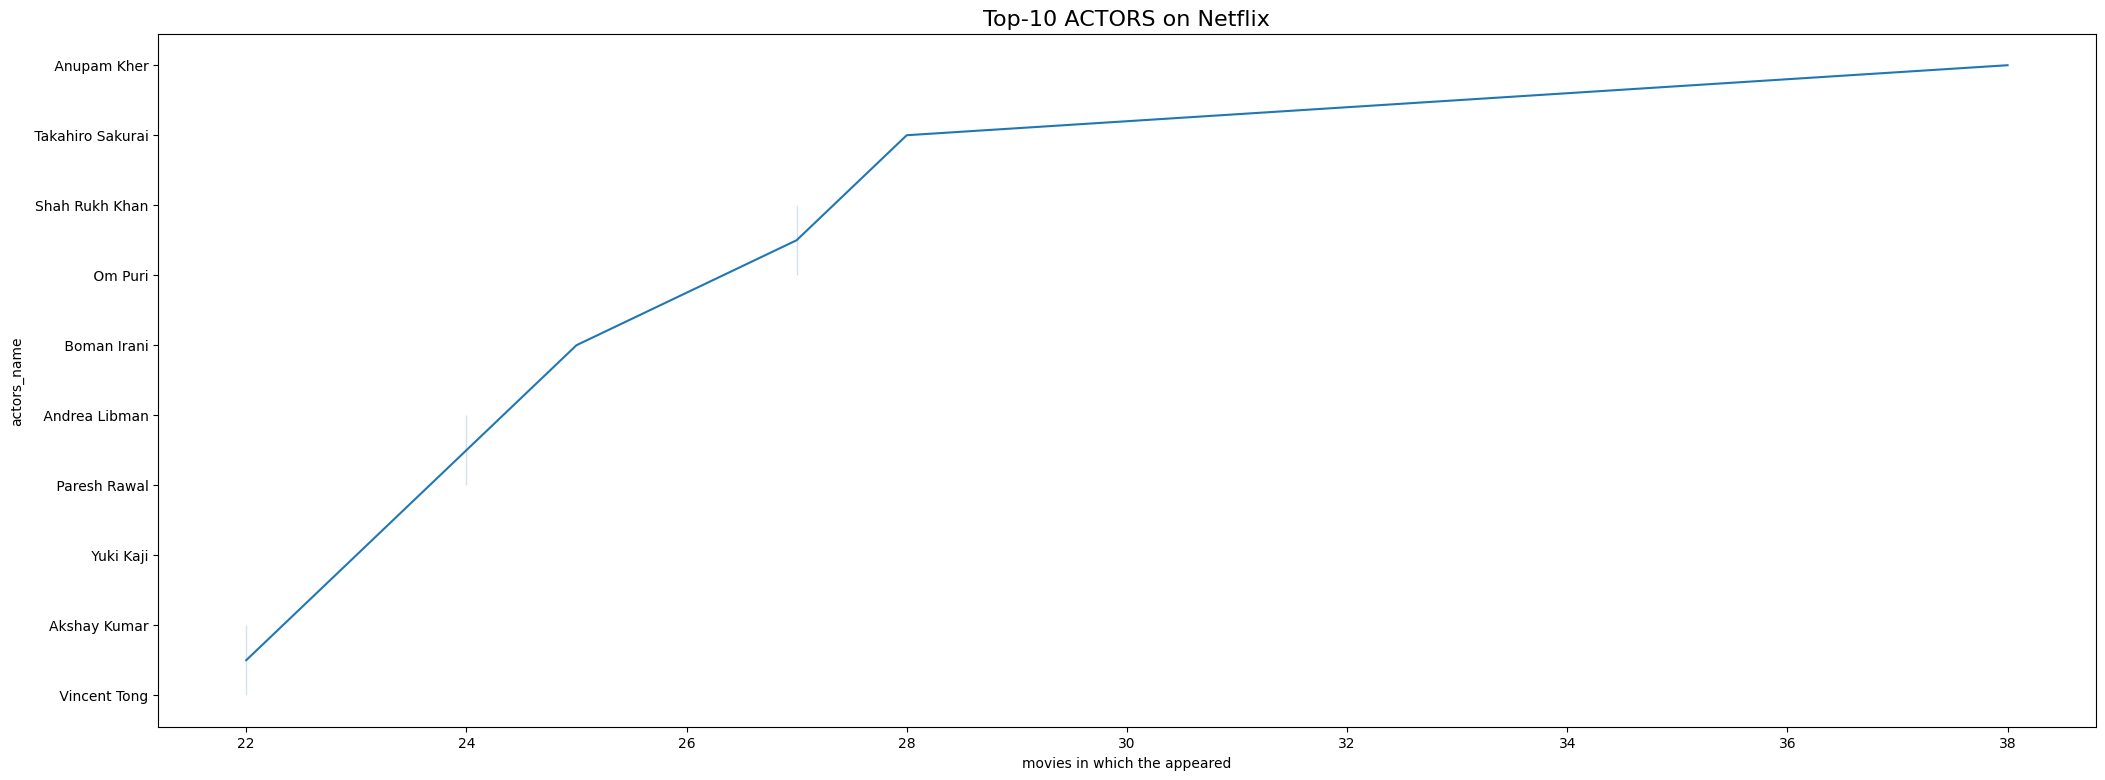

In [51]:
plt.figure(figsize=(25,9))
sns.lineplot(y='actors_name',x='movies in which the appeared',data=df_cast_count)
plt.title("Top-10 ACTORS on Netflix",size='16')
plt.xticks(rotation=360)
plt.show()

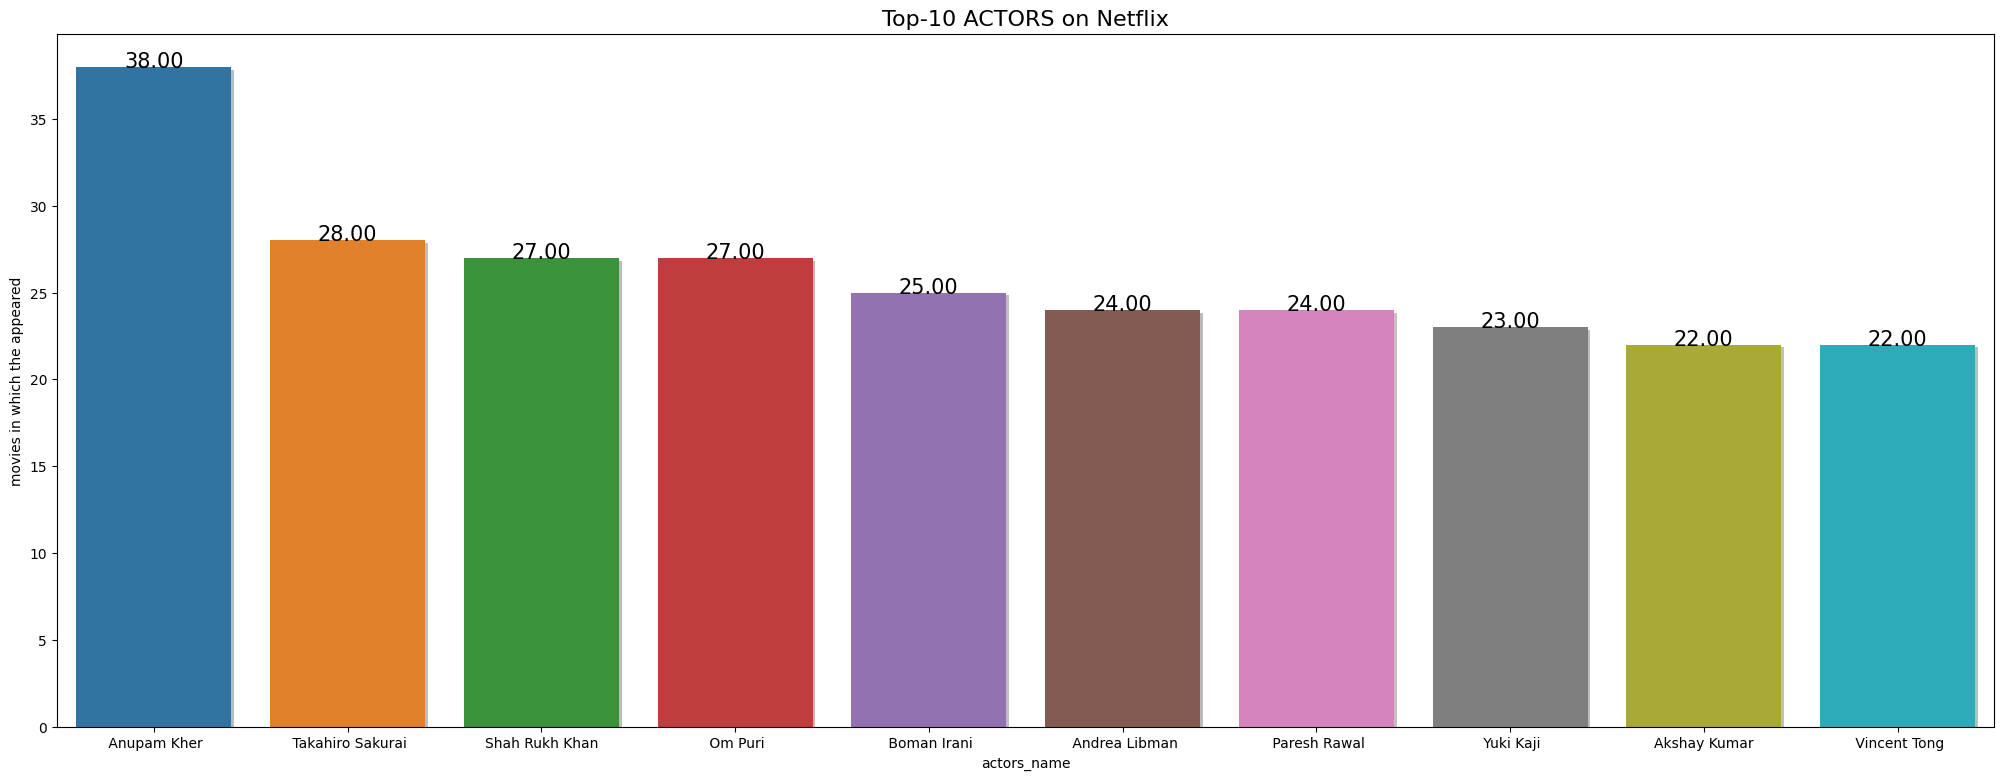

In [52]:
plt.figure(figsize=(25,9))
ax=sns.barplot(x='actors_name',y='movies in which the appeared',path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],data=df_cast_count)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
plt.title("Top-10 ACTORS on Netflix",size='16')
plt.xticks(rotation=360)
plt.show()

##### 1. Why did you pick the specific chart?

I have chosen this graph to explore the top actors on Netflix based on the number of movies they have appeared in. By analyzing this graph, we can identify the actors who have been most prolific in terms of their movie appearances on the platform.

##### 2. What is/are the insight(s) found from the chart?


In the analysis, it was found that Anupam Kher is the top actor on Netflix based on the number of movies in which he has appeared. He is followed by Takahiro Sakurai and then Shahrukh Khan. It is interesting to note that several Indian actors are among the top 10 actors, indicating their significant presence and popularity in Netflix movies. This observation highlights the diversity and global appeal of Indian actors in the streaming platform's content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the top actors on Netflix and their presence in movies can potentially have a positive business impact. Recognizing popular actors and understanding their influence can help in strategic decision-making for content acquisition, production, and marketing. By featuring well-known actors like Anupam Kher, Takahiro Sakurai, and Shahrukh Khan, Netflix can attract a wider audience and increase viewership, leading to positive business outcomes.

Regarding insights that may lead to negative growth, one potential scenario could be if there is an over-reliance on a small group of actors, neglecting the diversity and inclusion of other talented actors. This can limit the variety of content and potentially alienate certain audience segments. To ensure sustained growth, it is important for Netflix to strike a balance by promoting diversity, featuring actors from different backgrounds and regions, and exploring new talent. This approach can help capture diverse audience interests and preferences, leading to continued growth and success in the competitive streaming industry.

#### Chart - 7

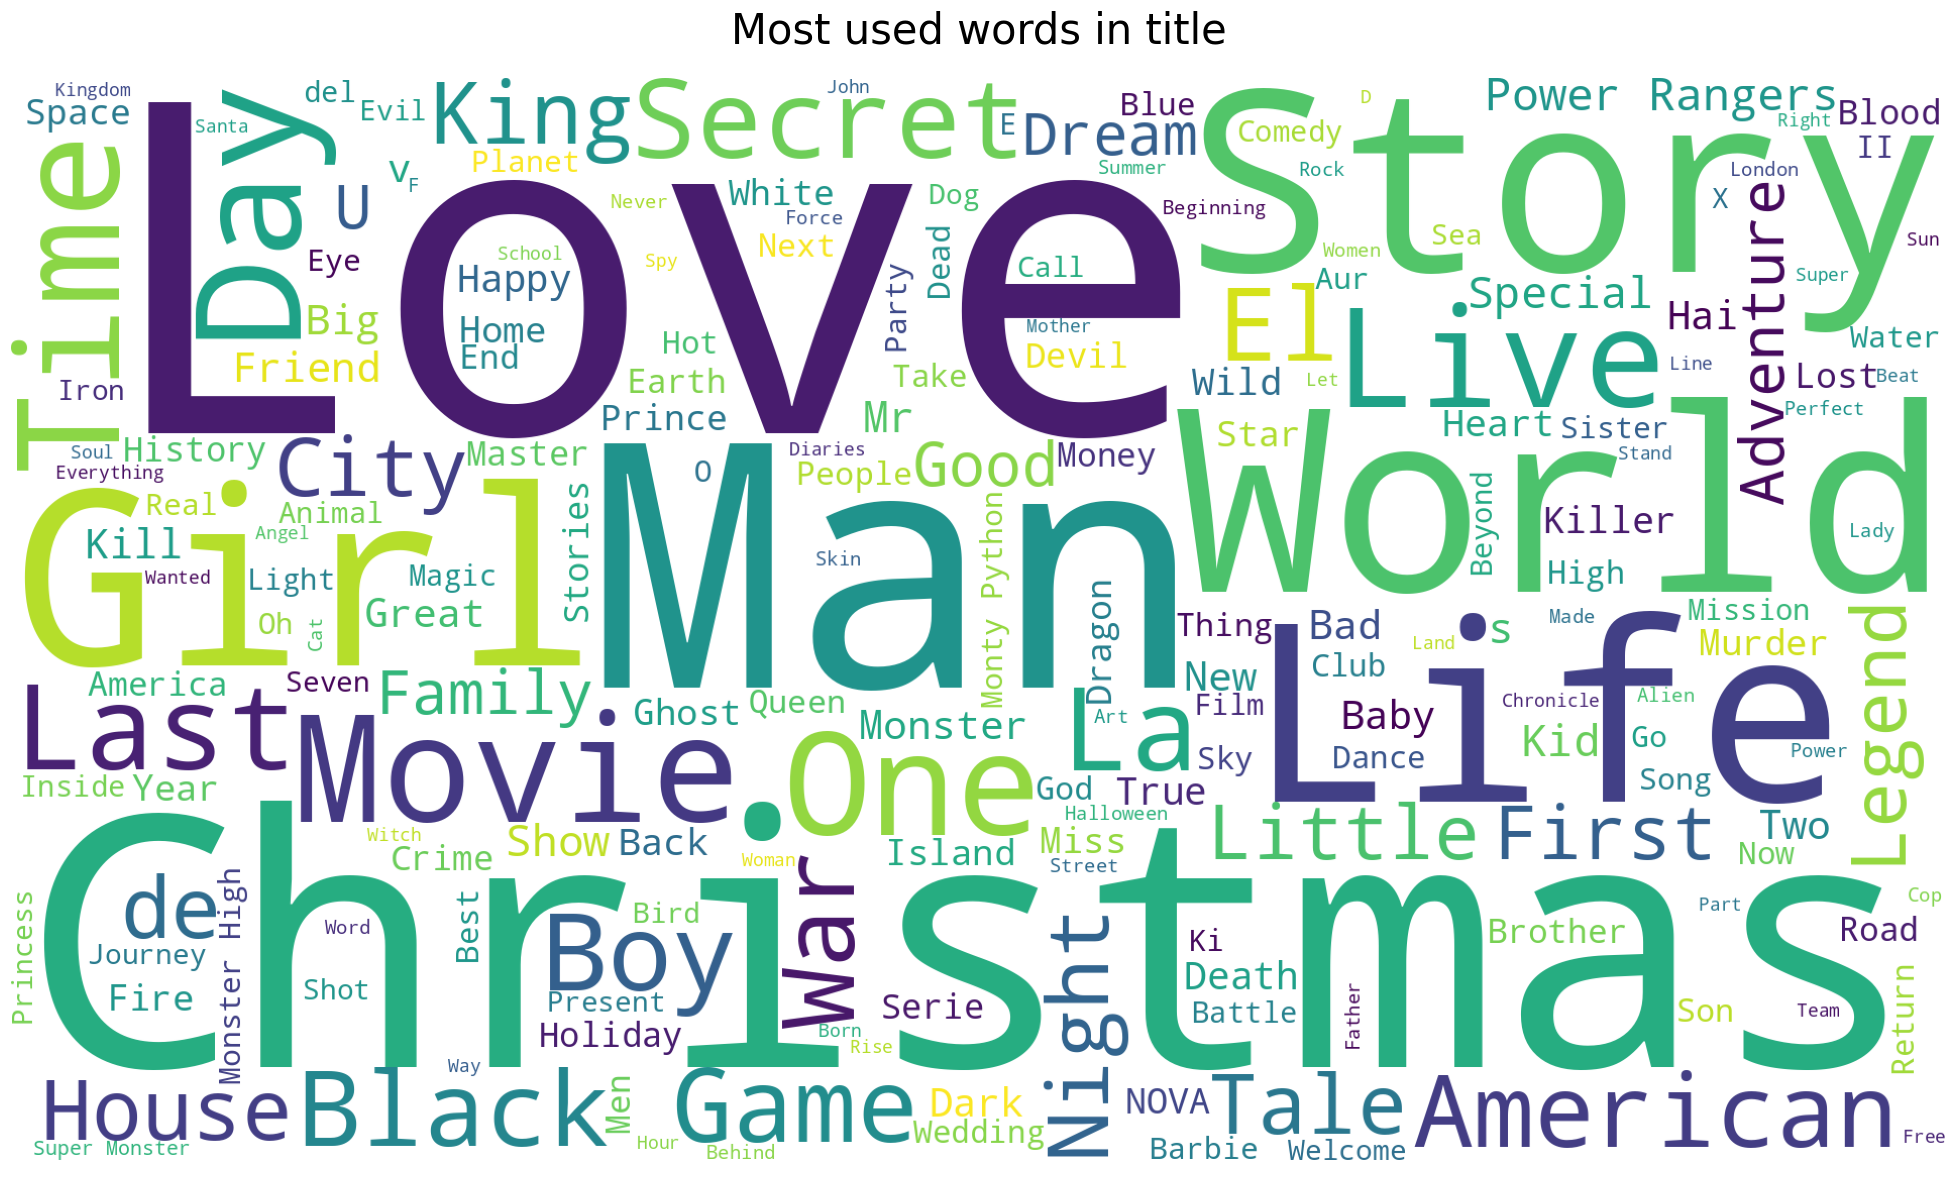

In [53]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(show_df1.title))
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

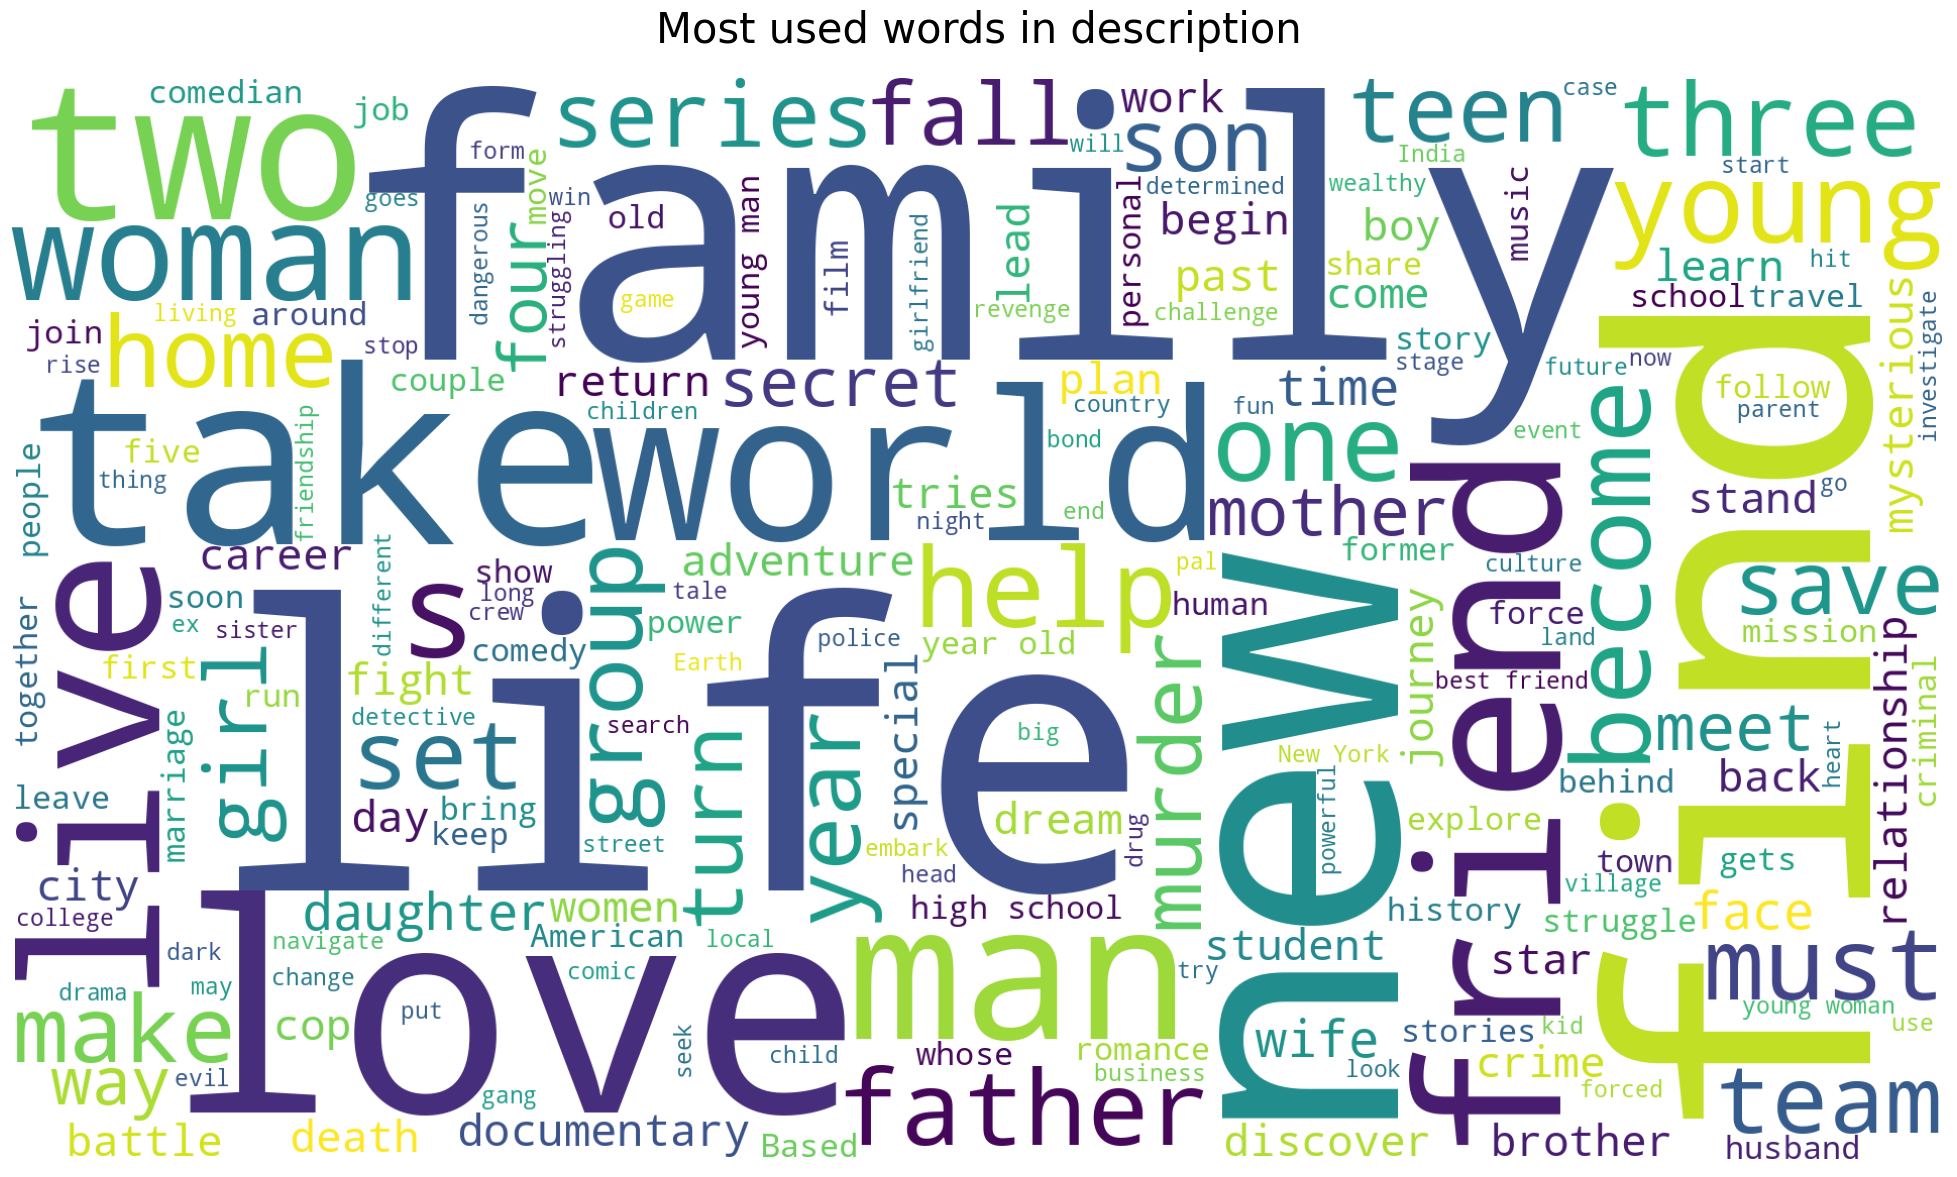

In [54]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(show_df1.description))
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

##### 1. Why did you pick the specific chart?

A word cloud (also called tag cloud or weighted list) is a visual representation of text data. Words are usually single words, and the importance of each is shown with font size or color.

##### 2. What is/are the insight(s) found from the chart?


In the analysis, it was observed that the most commonly used words in titles on Netflix include "Christmas," "love," "life," "girl," "family," "man," "black," "secret," and many more similar words. These recurring themes and keywords reflect the diverse range of content available on the platform.

Similarly, when analyzing the descriptions of shows and movies, it was found that words like "life," "women," "fall," "find," "family," "love," "new," "live," and various other related words are frequently used. These descriptive keywords provide insights into the central themes and narratives portrayed in the content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The prevalence of these words indicates the popularity and significance of these themes in the storytelling and content creation on Netflix. It also suggests the audience's interest in topics related to love, relationships, family dynamics, personal journeys, and various aspects of life.

These findings can inform content creators and Netflix itself about the preferences and trends among viewers. By incorporating these themes into their offerings, Netflix can cater to the interests of their target audience and potentially attract a larger viewership.

#### Chart - 8

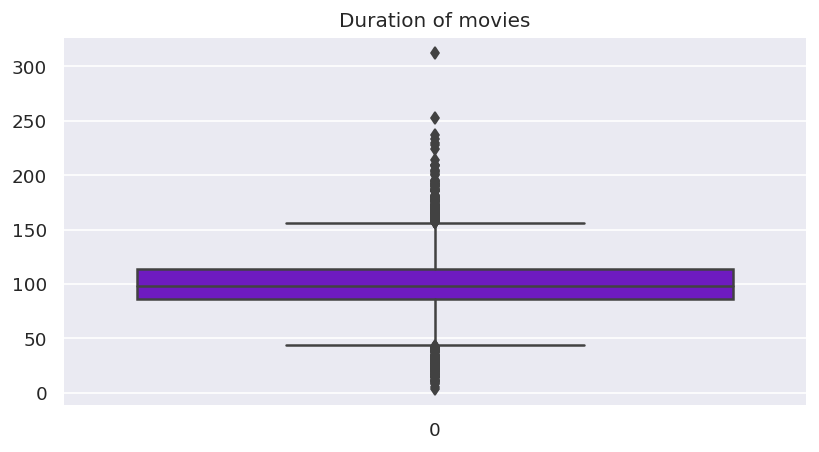

In [55]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.boxplot(data=duration_movies['duration'], color='#6e00db')
plt.title('Duration of movies')
plt.show()

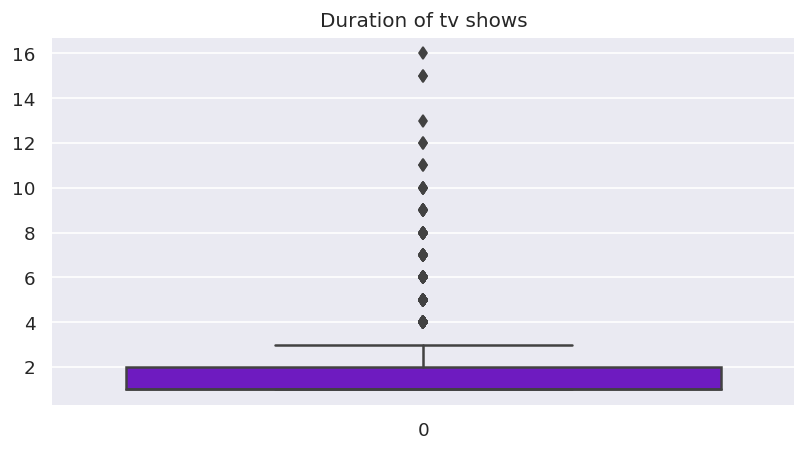

In [56]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.boxplot(data=duration_tv_shows['duration'], color='#6e00db')
plt.title('Duration of tv shows')
plt.show()

##### 1. Why did you pick the specific chart?

Here i ahve use boxplot as we know ,they are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Here we got the view of outliers in the typen column.

#### Chart - 9

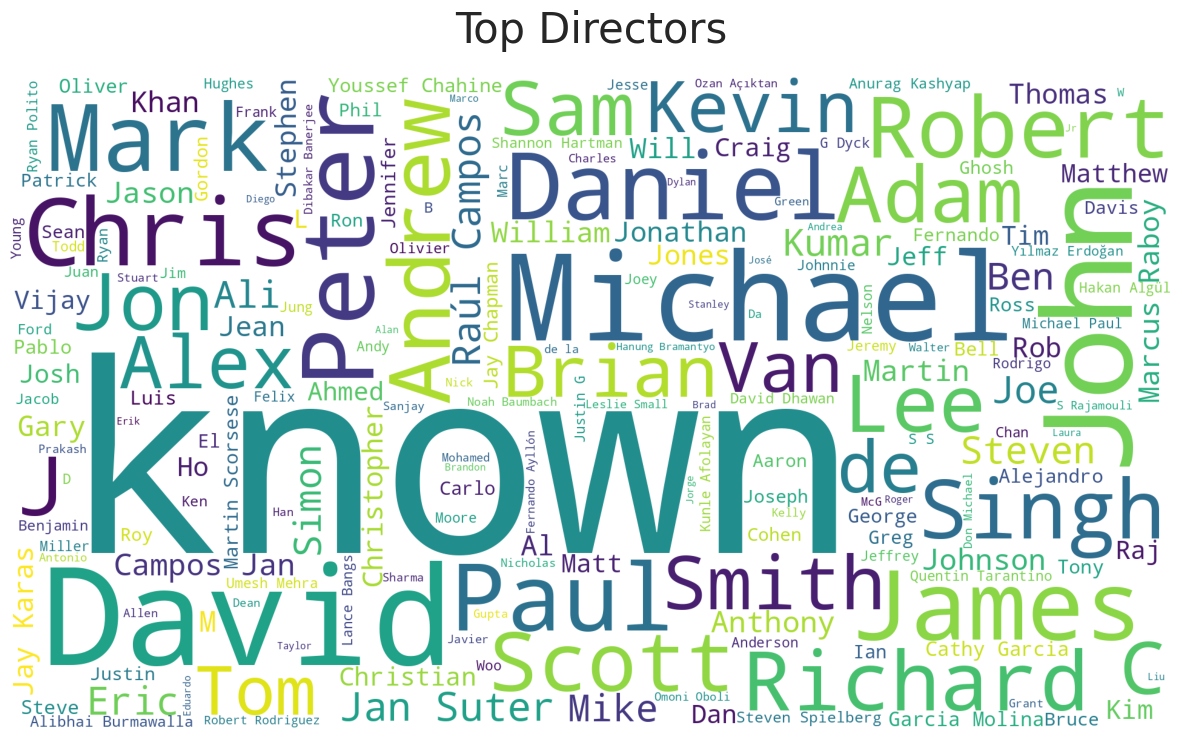

In [57]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(show_df1.director))
plt.title('Top Directors', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [58]:
# Chart - 9 visualization code
show_df1[show_df1['type']=='TV Show']['director'].value_counts()[:10]


not known                     2216
Alastair Fothergill              3
Shin Won-ho                      2
Iginio Straffi                   2
Rob Seidenglanz                  2
Stan Lathan                      2
Ken Burns                        2
Cosima Spender                   1
Jani Lachauer, Jakob Schuh       1
Jalil Lespert                    1
Name: director, dtype: int64

In [59]:
show_df1[show_df1['type']=='Movie']['director'].value_counts()[:10]

not known                 163
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Steven Spielberg           10
David Dhawan                9
Name: director, dtype: int64

 movies directed by director is : 2400
 TV shows directed by director is : 5377


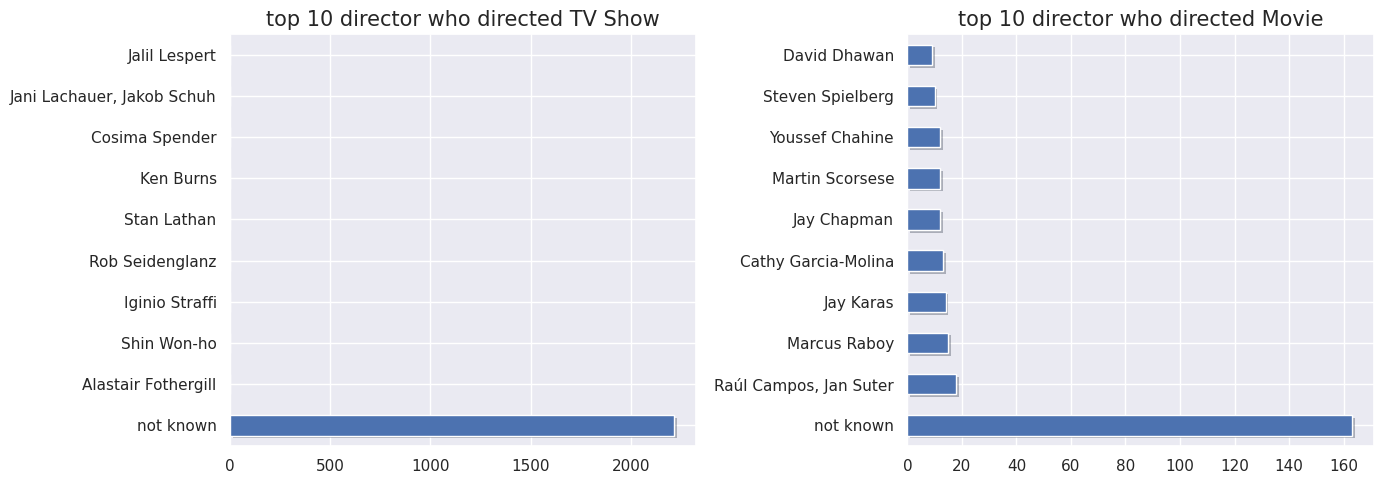

In [60]:
print(f" movies directed by director is : { show_df1[show_df1['type']=='TV Show']['director'].value_counts().sum()}")
print(f" TV shows directed by director is : { show_df1[show_df1['type']=='Movie']['director'].value_counts().sum()}")

fig,ax = plt.subplots(1,2, figsize=(14,5))


# top 10 director who directed TV show
show = show_df1[show_df1['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],ax=ax[0])
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = show_df1[show_df1['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I have chosen this graph to explore and identify the top directors of both TV shows and movies on Netflix. By analyzing the data, I aim to gain insights into the most prolific and successful directors in the streaming platform's content.

##### 2. What is/are the insight(s) found from the chart?

Based on the provided data, the top directors for TV shows on Netflix are:

Alastair Fothergill,Shin Won-ho,Iginio Straffi

Based on the provided data, the top directors for  movie on Netflix are:

Raúl Campos, Jan Suter,Marcus Raboy,Jay Karas


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about top directors on Netflix can have a positive impact. Benefits include reputation building, collaborations, and engaging fans. Risks include dependency on specific directors and not adapting to changing trends. To mitigate risks, Netflix should maintain a balanced approach, conduct market research, and foster relationships with directors.

#### Chart - 10

In [63]:
show_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### 1. Why did you pick the specific chart?

I have chosen this graph to explore and identify the top directors of both TV shows and movies on Netflix. By analyzing the data, I aim to gain insights into the most prolific and successful directors in the streaming platform's content.

##### 2. What is/are the insight(s) found from the chart?

Based on the provided data, the top directors for TV shows on Netflix are:

Alastair Fothergill,Shin Won-ho,Iginio Straffi

Based on the provided data, the top directors for  movie on Netflix are:

Raúl Campos, Jan Suter,Marcus Raboy,Jay Karas


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about top directors on Netflix can have a positive impact. Benefits include reputation building, collaborations, and engaging fans. Risks include dependency on specific directors and not adapting to changing trends. To mitigate risks, Netflix should maintain a balanced approach, conduct market research, and foster relationships with directors.

#### Chart - 14 - Correlation Heatmap

In [64]:
# Correlation Heatmap visualization code
show_df.head()


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

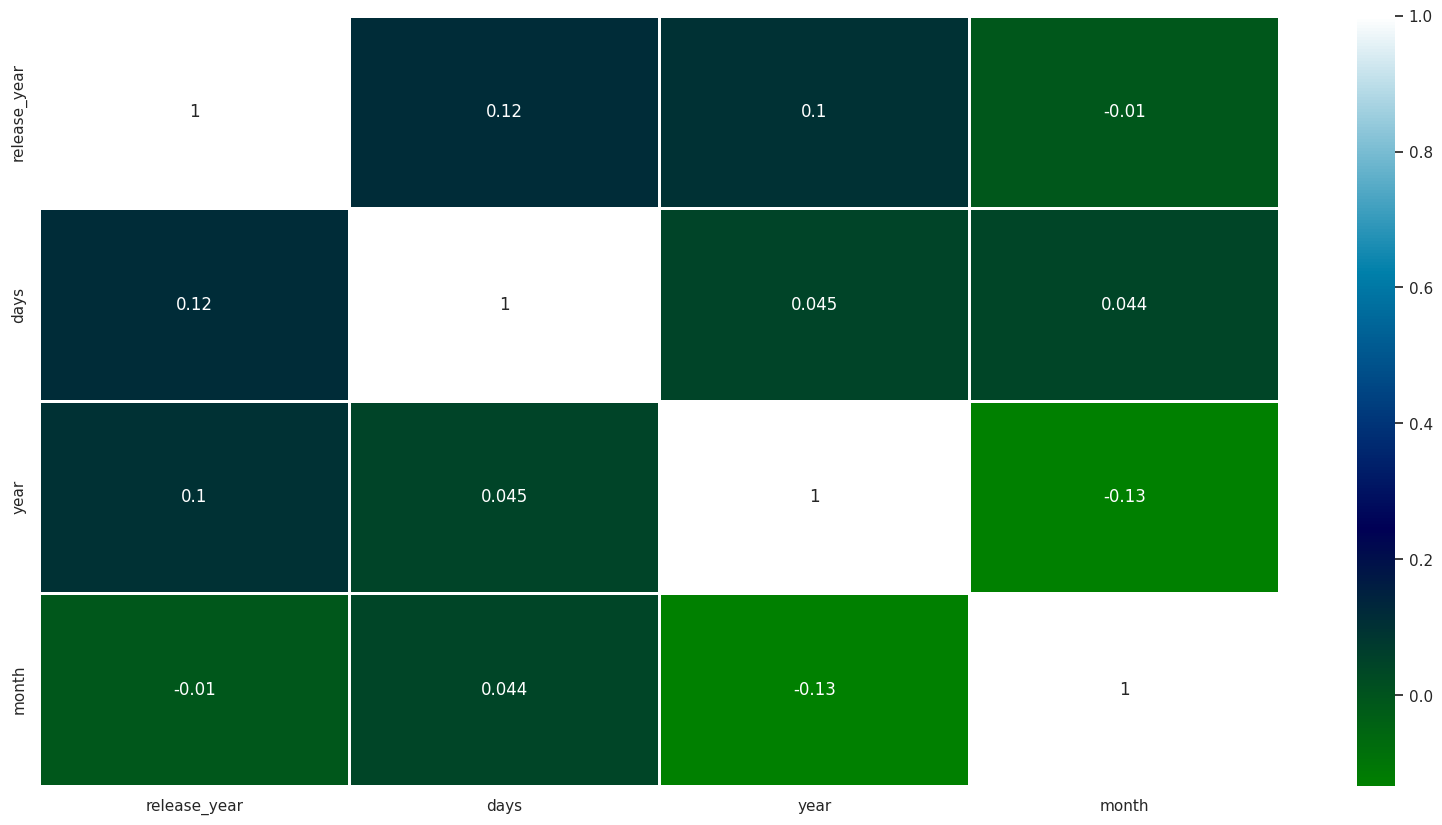

In [65]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(show_df1.corr(),ax = ax, annot=True, cmap = 'ocean', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

We know that heatmaps are used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

Data is evenly correlated.

#### Chart - 15 - Pair Plot

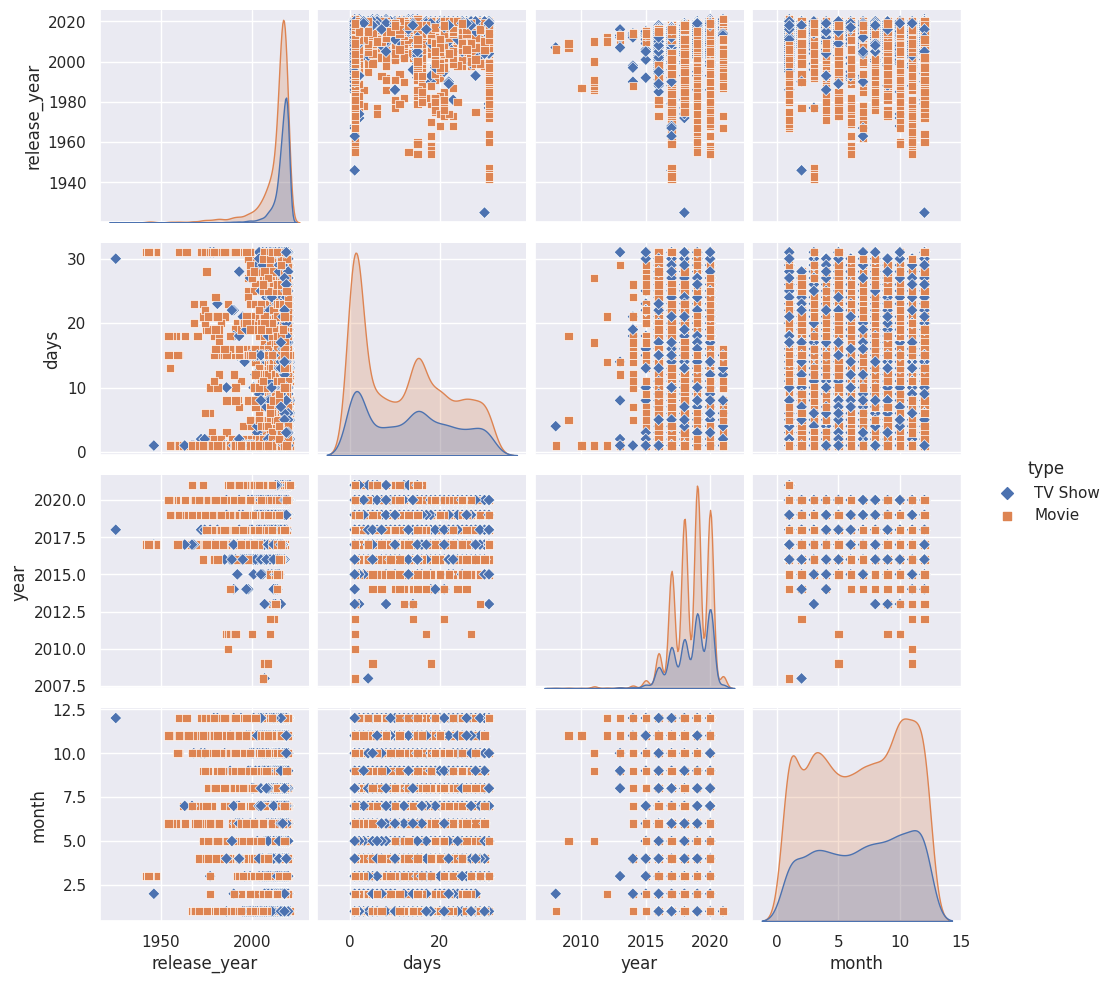

In [66]:
# Pair Plot visualization code
sns.pairplot(show_df1,hue='type', markers=["D", "s"])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that the distribution of movie are more impactful over tv shows in accordance of tha dataset given. Movies are more downloaded as compared to tv shows.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average duration between movies and TV shows on Netflix.
Alternative Hypothesis (H1): There is a significant difference in the average duration between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
from scipy import stats


# Extract the relevant columns: 'duration' and 'type'
duration_movies = show_df1[show_df1['type'] == 'Movie']['duration']
duration_tv_shows = show_df1[show_df1['type'] == 'TV Show']['duration']

# Preprocess the 'duration' column
duration_movies = duration_movies.str.extract('(\d+)').astype(float)
duration_tv_shows = duration_tv_shows.str.extract('(\d+)').astype(float)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(duration_movies, duration_tv_shows, equal_var=False, nan_policy='omit')

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)


The t-statistic and p-value obtained from the t-test provide information about the comparison between the average durations of movies and TV shows on Netflix.

The t-statistic, in this case, has a value of 249.87262245. It represents the magnitude of the difference between the mean durations of movies and TV shows, relative to the variability within each group. A larger absolute value of the t-statistic suggests a greater difference between the means of the two groups.

The p-value, which is calculated as 0.0, indicates the probability of observing a difference as extreme as, or more extreme than, the one observed, assuming that the null hypothesis is true (i.e., there is no significant difference between the average durations of movies and TV shows). A p-value of 0.0 essentially means that the observed difference is highly unlikely to occur by chance alone, assuming the null hypothesis.

The t-statistic and p-value obtained from the t-test provide information about the comparison between the average durations of movies and TV shows on Netflix.

The t-statistic, in this case, has a value of 249.87262245. It represents the magnitude of the difference between the mean durations of movies and TV shows, relative to the variability within each group. A larger absolute value of the t-statistic suggests a greater difference between the means of the two groups.

The p-value, which is calculated as 0.0, indicates the probability of observing a difference as extreme as, or more extreme than, the one observed, assuming that the null hypothesis is true (i.e., there is no significant difference between the average durations of movies and TV shows). A p-value of 0.0 essentially means that the observed difference is highly unlikely to occur by chance alone, assuming the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

The statistical test used in the provided code is the independent two-sample t-test (stats.ttest_ind()) from the SciPy library. This test is commonly used to compare the means of two independent groups to determine if there is a significant difference between them.

##### Why did you choose the specific statistical test?

The independent two-sample t-test was chosen as the specific statistical test in this scenario because we are comparing the means of two independent groups: movies and TV shows.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant difference in the average duration between movies released in the United States and movies released in the United Kingdom.


H1: There is a significant difference in the average duration between movies released in the United States and movies released in the United Kingdom.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
from scipy import stats


# Extract the relevant columns: 'duration' and 'country'
duration_usa = show_df1[(show_df1['type'] == 'Movie') & (show_df1['country'] == 'United States')]['duration']
duration_uk = show_df1[(show_df1['type'] == 'Movie') & (show_df1['country'] == 'United Kingdom')]['duration']

# Preprocess the 'duration' column
duration_usa = duration_usa.str.extract('(\d+)').astype(float)
duration_uk = duration_uk.str.extract('(\d+)').astype(float)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(duration_usa, duration_uk, equal_var=False, nan_policy='omit')

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)


The T-Statistic and P-value obtained from the t-test provide information about the comparison between the average duration of movies released in the United States and the United Kingdom.

The T-Statistic, in this case, has a value of -2.26674952. It represents the magnitude of the difference between the mean durations of movies released in the two countries, relative to the variability within each group. The negative sign indicates that the mean duration of movies released in the United States is lower than the mean duration of movies released in the United Kingdom.

The P-value, which is calculated as 0.02388009, indicates the probability of observing a difference as extreme as, or more extreme than, the one observed, assuming that the null hypothesis is true (i.e., there is no significant difference in the average duration between the two countries). A P-value less than the significance level (e.g., 0.05) suggests that the observed difference is statistically significant, providing evidence against the null hypothesis.

In this case, the obtained P-value (0.02388009) is less than 0.05, which suggests that there is a statistically significant difference in the average duration of movies released in the United States and the United Kingdom. Therefore, you can reject the null hypothesis and conclude that there is a significant difference in the average duration between movies released in these two countries.

##### Which statistical test have you done to obtain P-Value?

  i have used independent two-sample t-test to obtain the p-value. The t-test is used to determine whether there is a significant difference in the average duration between movies released in the United States and movies released in the United Kingdom.

##### Why did you choose the specific statistical test?

the independent two-sample t-test is a suitable choice for comparing the average durations of movies released in the United States and the United Kingdom. It allows us to determine whether there is a statistically significant difference between the two groups based on the obtained t-statistic and p-value.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant difference in the average release year between movies and TV shows on Netflix.

H1: There is a significant difference in the average release year between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
from scipy import stats

# Extract the relevant columns: 'release_year' and 'type'
release_year_movies = show_df1[show_df1['type'] == 'Movie']['release_year']
release_year_tv_shows = show_df1[show_df1['type'] == 'TV Show']['release_year']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(release_year_movies, release_year_tv_shows, equal_var=False, nan_policy='omit')

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)


The t-statistic measures the difference between the means of the two groups (movies and TV shows) relative to the variation within each group. In this case, the t-statistic value of -18.786223791998147 indicates a significant difference in the means of the 'release_year' variable between movies and TV shows.

 The p-value represents the probability of observing the obtained t-statistic (or a more extreme value) if the null hypothesis is true. In this case, the extremely small p-value of 6.472950595817385e-77 suggests strong evidence against the null hypothesis. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the average release year between movies and TV shows on Netflix.

##### Which statistical test have you done to obtain P-Value?

 The statistical test used to obtain the p-value in this case is the independent two-sample t-test.

##### Why did you choose the specific statistical test?

By using the independent two-sample t-test, we can evaluate whether the observed difference in the average release year between movies and TV shows is statistically significant or if it could be due to random chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputatio
show_df.isnull().sum()

In [ ]:
# we wull replace this nan values
show_df[['director','cast','country']] = show_df[['director','cast','country']].fillna('not known')
show_df['rating'] = show_df['rating'].fillna(show_df['rating'].mode()[0])
show_df.dropna(axis=0, inplace = True)

In [ ]:
show_df.info()

In [ ]:
show_df.sample(3)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we did not want to loose our information so we just simply replace our nan values with not known and in rating column we just replaced that nan values with its mode... rest we just droped if there were any nan values

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in show_df.describe().columns:
  if abs(show_df[i].mean()-show_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=show_df['release_year'], ax=ax[0])
sns.boxplot(data=show_df, ax=ax[1])

most of the data is in taxtual format
The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 3. Categorical Encoding

as we are working on discriptions and listed_in columns we dont require encoding here

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
show_df['text_data']=show_df['listed_in'] + show_df['description']

In [ ]:
show_df['text_data'].sample(5)

In [ ]:
# Expand Contraction
!pip install contractions
import contractions


In [ ]:
# applying fuction for contracting text
show_df['description']= show_df['description'].apply(lambda x:contractions.fix(x))
show_df['listed_in']=show_df['listed_in'].apply(lambda x:contractions.fix(x))

In [ ]:
show_df['text_data'].sample(5)

#### 2. Lower Casing

In [ ]:
# Lower Casing
show_df['text_data'] = show_df['text_data'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

show_df['text_data'] = show_df['text_data'].apply(remove_punctuation)
show_df['text_data'].sample(5)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
# Remove links

show_df['text_data'] = show_df['text_data'].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
show_df['text_data'] = show_df['text_data'].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

In [ ]:
# extracting the stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying stopwords function.
show_df['text_data'] = show_df['text_data'].apply(stopwords)

In [ ]:
# Remove White spaces
show_df['text_data'] = show_df['text_data'].apply(lambda x: " ".join(x.split()))

In [ ]:
show_df['text_data'].sample(5)

#### 6. Rephrase Text

It is not necessary in the given data

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
show_df['text_data'] = show_df['text_data'].apply(nltk.word_tokenize)

In [ ]:
show_df['text_data'][0]

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
#applying Lemmatization

from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the data columns column
show_df['text_data'] = show_df['text_data'].apply(lemmatize_tokens)

In [ ]:
show_df['text_data'].sample(4)

##### Which text normalization technique have you used and why?

I have used lemmatization technique

Lemmatization
The purpose of lemmatization is same as that of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation such as “Histori”. Here, lemmatization comes into picture as it gives meaningful word.


Lemmatization takes more time as compared to stemming because it finds meaningful word/ representation. Stemming just needs to get a base word and therefore takes less time.


Stemming has its application in Sentiment Analysis while Lemmatization has its application in Chatbots, human-answering.

One thing to note is that a lot of knowledge and understanding about the structure of language is required for lemmatization. Hence, in any new language, the creation of stemmer is easier in comparison to lemmatization algorithm.

Lemmatization and Stemming are the foundation of derived (inflected) words and hence the only difference between lemma and stem is that lemma is an actual word whereas, the stem may not be an actual language word.
Lemmatization uses a corpus to attain a lemma, making it slower than stemming. Further, to get the proper lemma, you might have to define a parts-of-speech. Whereas, in stemming a step-wise algorithm is followed making it faster.

The above points show that stemming should be used if speed is important since lemmatizers scan a corpus which is a time-consuming task. Further, the choice between lemmatizers and stemmers also depends on the problem you are working on.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')
show_df['text_data'] = show_df['text_data'].apply(nltk.pos_tag)
show_df['text_data'].head()

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
bag_of_words = show_df.text_data

In [ ]:
t_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False,max_features=20000)
X_tfidf= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
X_tfidf.shape

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()
X

##### Which text vectorization technique have you used and why?

Yes i have used Tfidf vectorizer technique
TFIDF is the product of TF with IDF.
Since TF values lie between 0 and 1, not using ln can result in high IDF for some words, thereby dominating the TFIDF. We don’t want that, and therefore, we use ln so that IDF should not completely dominate the TFIDF.

Term Frequency — Inverse Document Frequency (TFIDF) is a technique for text vectorization based on the Bag of words (BoW) model. It performs better than the BoW model as it considers the importance of the word in a document into consideration. The main limitation is that it does not capture the semantic meaning of the words. This limitation of TFIDF can be overcome by more advanced techniques such as word2Vec.

Disadvantage of TFIDF
It is unable to capture the semantics. For example, funny and humorous are synonyms, but TFIDF does not capture that. Moreover, TFIDF can be computationally expensive if the vocabulary is vast.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
show_df1

Here we just extrated our date column and than we splitted our type column into movies and tv shows further we just used our listed_in column and discription column on which we supposed to work

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
show_df1.columns

In [ ]:
# We will use  only two columns as we thibk they affect our data much categorical and text based column
show_df1['text_data'] = show_df1['description'] +  show_df1['listed_in']


##### What all feature selection methods have you used  and why?

here we just simply added out interested textual columns for our further clustering problem

##### Which all features you found important and why?

here we found listed_in and discription column important

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No ,no transformation is required

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

##### Which method have you used to scale you data and why?

I have used standard scaler method over here
  The StandardScaler function of sklearn is based on the theory that the dataset's variables whose values lie in different ranges do not have an equal contribution to the model's fit parameters and training function and may even lead to bias in the predictions made with that model.
Many machine learning algorithms may encounter issues due to these variations in the starting features. For algorithms that calculate distance, for instance, if any of the dataset's features have values having large or completely different ranges, that particular feature of the dataset will control the distance calculation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called dimensionality reduction.

A dataset contains a huge number of input features in various cases, which makes the predictive modeling task more complicated. Because it is very difficult to visualize or make predictions for the training dataset with a high number of features, for such cases, dimensionality reduction techniques are required to use.

Dimensionality reduction technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.

It is commonly used in the fields that deal with high-dimensional data, such as speech recognition, signal processing, bioinformatics, etc. It can also be used for data visualization, noise reduction, cluster analysis, etc.
Benefits of applying Dimensionality Reduction
Some benefits of applying dimensionality reduction technique to the given dataset are given below:

By reducing the dimensions of the features, the space required to store the dataset also gets reduced.
Less Computation training time is required for reduced dimensions of features.
Reduced dimensions of features of the dataset help in visualizing the data quickly.
It removes the redundant features (if present) by taking care of multicollinearity.

 Problem with high dimensional data?

It can mean high computational cost to perform learning.

It often leads to over-fitting when learning a model, which means that the model will perform well on the training data but poorly on test data.

Data are rarely randomly distributed in high-dimensions and are highly correlated, often with spurious correlations.

The distances between a nearest and farthest data point can become equidistant in high dimensions, that can hamper the accuracy of some distance-based analysis tools.

Why do we need Dimensionality Reduction?

Dimensionality reduction helps with these problems, while trying to preserve most of the relevant information in the data needed to learn accurate, predictive models.

There are often too many factors on the basis of which the final prediction is done. These factors are basically variables called features.

The higher the number of features, the harder it gets to visualize the training set and then work on it.

Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play.

Importance of Dimensionality reduction?

It reduces the time and storage space required.

It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.

It avoids the curse of dimensionality.

It removes irrelevant features from the data, Because having irrelevant features in the data can decrease the accuracy of the models and make your model learn based on irrelevant features.


In [ ]:
# DImensionality Reduction (If needed)
pca = PCA()
pca.fit(X)

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='dashdot')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'green', fontsize=16)
plt.show()

In [ ]:
pca_tuned = PCA(n_components=2)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

In [ ]:
 # shape
print("original shape: ", X.shape)
print("transformed shape:", X_transformed.shape)

In [ ]:
# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))



A good strategy is to choose the number of dimensions for which the cumulative explained variance exceeds a threshold, e.g., 0.95 (95%).
here we are choosing it to 3 components as we checked above..

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Yess I have used pca

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.


PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.


PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. Some real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels. It is a feature extraction technique, so it contains the important variables and drops the least important variable.

Applications of Principal Component Analysis

PCA is mainly used as the dimensionality reduction technique in various AI applications such as computer vision, image compression, etc.

It can also be used for finding hidden patterns if data has high dimensions. Some fields where PCA is used are Finance, data mining, Psychology, etc.


### 8. Data Splitting

We did not do any splitting here as it its clustering problem.

### 9. Handling Imbalanced Dataset

In [ ]:
show_df1.info()

No the data is not imbalanced

## ***7. ML Model Implementation***

### ML Model - 1

KMeans Clustering

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering
What is K-Means Algorithm?
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.
Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

ELBOW METHOD

This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.



In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=20)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)


In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k=2 (i.e., the Sum of squared distances falls suddenly), indicating the optimal k for this dataset is 2.

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 10, init= 'k-means++', random_state = 42)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
    plt.title('Visualizing for 10 clusters K')
plt.legend()
plt.show()

Here we just observed that for 10 clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_transformed)
y_kmeans= kmeans.predict(X_transformed)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Visualizing for optimal K')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### ML Model - 2

SILHOUETTE METHOD

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:
Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=42)
    model.fit(X_transformed)
    y1 = model.predict(X_transformed)
    score = silhouette_score(X_transformed,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.show() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(11)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette', timings=False
)

visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show()
visualizer.poof()

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show()

Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.
 A higher ratio signifies the cluster is far away from its other clusters and that the cluster is more well-defined

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_transformed)
y_kmeans= kmeans.predict(X_transformed)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Optimal cluster from Silhouette score')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, s=50, cmap='RdYlBu_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### ML Model - 3

Hierarchical clustering is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.
Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.
Dendrogram in Hierarchical clustering


A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. They are frequently used in biology to show clustering between genes or samples, but they can represent any type of grouped data.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'),orientation='top',show_leaf_counts=True)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')

plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. here it is 2


 Agglomerative Clustering:
 Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters = 2)      #n_clusters=2
# fit model and predict clusters
y_hc = model.fit_predict(X_transformed)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(X_transformed[row_ix, 0], X_transformed[row_ix, 1])
# show the plot
plt.show()

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X_transformed,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_transformed, y_hc)
print("davies_bouldin_score %0.7f"%davies_bouldin_score(X_transformed, y_hc))


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=5, min_samples=400).fit(X_transformed)
labels = db.labels_

# Number of clusters in labels, checking noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

The best value is 1, the worst is -1. A higher score indicates that the model has better defined, more dense clusters. Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X_transformed)
plt.figure(figsize=(13,8))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y_pred,cmap='RdYlBu_r')

**AffinityPropagation**


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

# Configuration options
num_samples_total = 100
cluster_centers = [(20,20), (4,4)]
num_classes = len(cluster_centers)

# Generate data
X_transformed, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1)

# Fit AFfinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X_transformed)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

# Predict the cluster for all the samples
P = afprop.predict(X_transformed)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Insights that we found:

The analysis of the dataset shows that approximately **30.9% of the content on Netflix is comprised of TV shows**, while the remaining **69.1% is dedicated to movies**. This information is helpful in understanding the content distribution within the dataset. It indicates that there is a higher production of movies compared to TV shows. There could be various factors contributing to this observation, such as the preference for movies among viewers, the availability of diverse movie content, the time-consuming nature of producing TV shows, and other considerations. These insights provide valuable context for understanding the content landscape on Netflix and the emphasis placed on different types of programming.

***Content Analysis:***

---


The analysis revealed that the **United States has the
highest number of content on Netflix**, followed by India. **The number of content additions increased from 2015, with peak years being 2019 for movies and 2020 for TV shows.** However, there has been a decline in content additions afterward.

***Ratings and Genres:***

---


The **most common rating for both movies and TV shows** on Netflix is **"TV-MA"**. The top genres vary across different categories, with international movies, dramas, and comedies being popular overall. For TV shows, the top genres are kids' TV, international TV shows, and dramas. In movies, the top genres are documentaries, stand-up comedy, dramas, and international movies.

***Release Year Analysis:***

---


 The number of releases has been increasing since 2001, with the **highest number of releases in 2018(1120)**. The** release of TV shows** has been increasing each year, **with the peak in 2020(457)**. In movies, the release year peaked in 2017, followed by a steady increase until 2016, a slight fall in 2018, and a significant decline in 2019 and 2020.

***Top Actors***:

---


 **Anupam Kher is the top actor(38) on Netflix, followed by Takahiro Sakurai(27) and Shahrukh Khan(27) in movies**. Several Indian actors are among the top 10 actors, indicating their popularity and presence in Netflix movies.

***Top Directors***:

---


 The **top directors for TV shows** on Netflix include**Alastair Fothergill, Shin Won-ho, Iginio Straffi**, and others. **For movies, directors like Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas stand out**.



The gained insights can potentially have a positive business impact for Netflix. They provide opportunities for recognition, collaborations, and engaging viewers. However, there are risks such as dependency on specific directors and not adapting to changing trends. **Netflix should strive for a balanced approach, conduct market research, and maintain strong relationships with directors to mitigate these risks and sustain positive growth.**
We tested 5  models (**k_means, Silhoutte score analysis, Dendogram, Dbscan, Affinity propogation**)

We got **cluster 2 	as optimal** and the  **Sillhoute: 0.6514** as the score

---


---


We got the optimal cluster to be 2 from checking different models.

In [ ]:
from prettytable import PrettyTable
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Adding rows
myTable.add_row(['1',"K-Means with elbow method ", "netflix", "2"])
myTable.add_row(['2',"K-Means with silhouette_score ", "netflix", "2"])
myTable.add_row(['3'," Dendrogram  ", "netflix", "2"])
myTable.add_row(['4'," DBSCAN  ", "netflix", "1"])
myTable.add_row(['5'," AffinityPropagation  ", "netflix", "2"])
print(myTable)

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***